# Section 1

# Q1

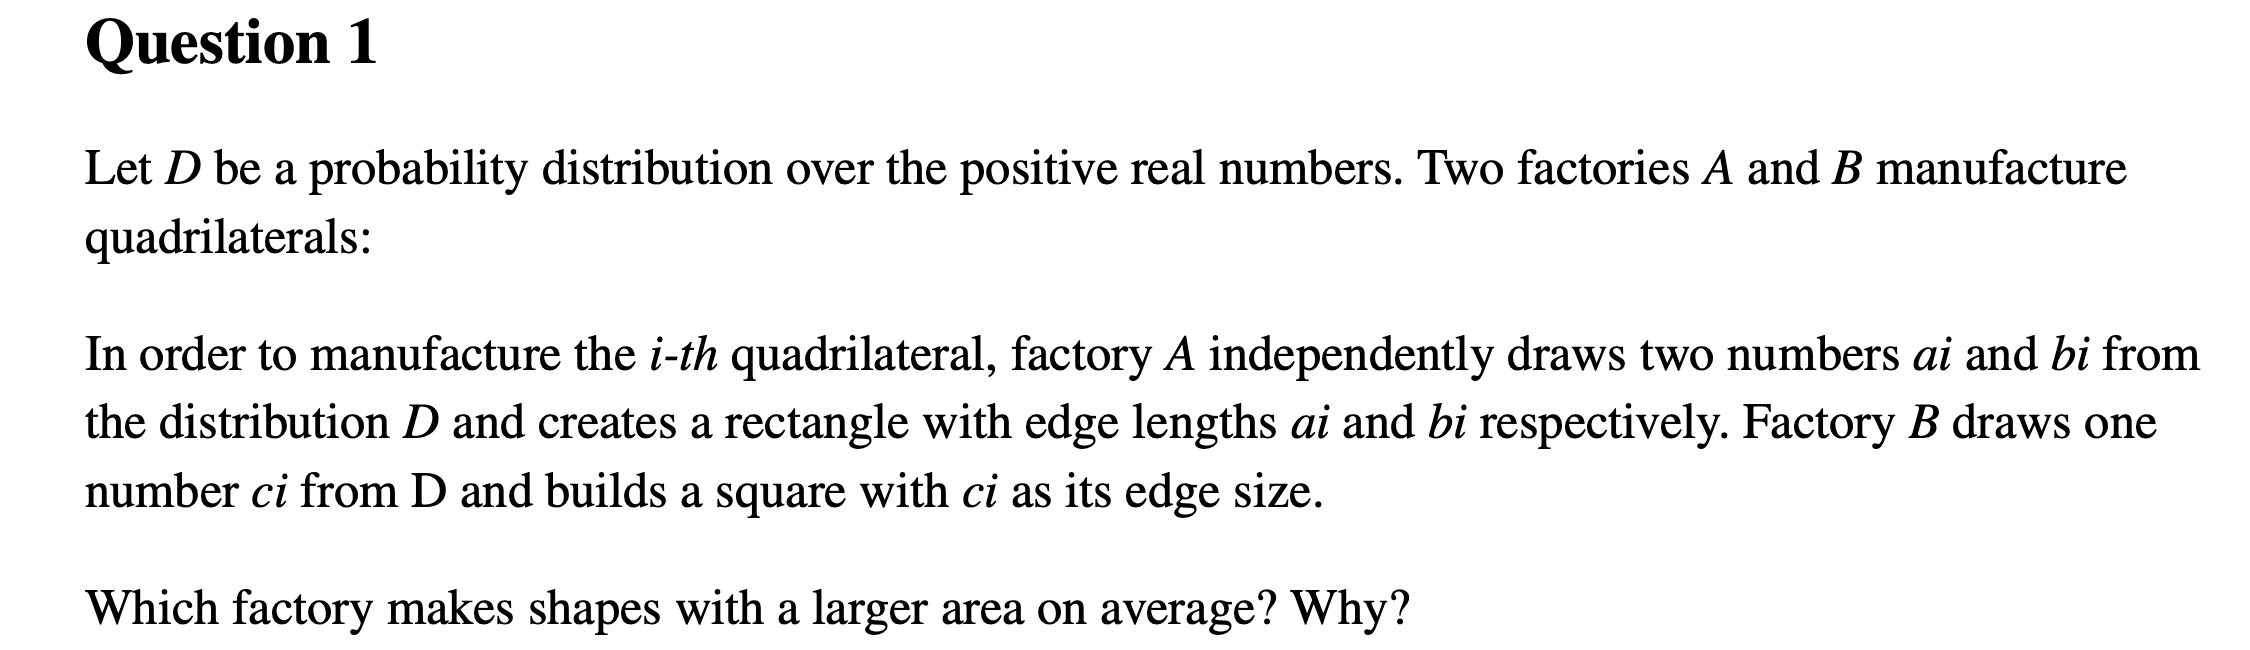

## Problem Statement

Given probability distribution $D$ is over the positive real numbers. We know the interval is between $(0, \infty)$.

Given two factories $A$ and $B$ to manufacture quadrilaterals.

$A$ draws two numbers $ai$ and $bi$ from the distribution $D$ and creates a rectangle with shape=$ai * bi$.

$B$ draws one number $ci$ from $D$ and creates a square with shape=$ci * ci$.

## Solution

Let's start with the known information that probability distribution $D$ is a continuous probability distribution.

Normal distribution does not satisfy the requirement of only taking positive real numbers.

Given probability distribution $D$, we define:
- $E[X] = \mu$ is the expected value of distribution $D$
- $Var[X] = \sigma^2$ is the variance of distribution $D$

Based on the information provided by the question, we know:
1. Factory A is the product of two iid random variables from $D$.
2. Factory B is the sqaure times of random variable from $D$.

Our goal is to find the expected value of distributions factory A and B.

Proof of the expected value of the product of two independent random variables $x, y$:
$$
\begin{aligned}
    E[xy] &= \int_{0}^{\infty} \int_{0}^{\infty} xyf(x,y)dydx \\
          &= \int_{0}^{\infty} \int_{0}^{\infty} xyf(x)f(y)dydx \\
          &= \int_{0}^{\infty} xf(x)dx \int_{0}^{\infty} yf(y)dy \\
          &= E[x]E[y]
\end{aligned}
$$

Expected value of factory A is $E_A[X] = E[X]^2 = \mu^2$.

Expected value of factory B is $E_B[X] = E[X^2] = \int_{0}^{\infty} x^2f(x)dx$.

Take a look at the results of expected values of factory A and B, we can see that the difference between them is as same as the variance $Var[X] = \sigma^2$.

Eventually, we derive the equations:

- $Var[X] = E[X^2] - E[X]^2 = E_B[X] - E_A[X] \geq 0$

- $E_B[X] \geq E_A[X]$

**In most cases factory B makes greater shape of quadrilateral than A, and only when the variance of distribution is zero, the factory A equals B.**

Assume distribution $D$ is uniform distribution in $[0, 1]$, we can model $f(x) = \frac{1}{b-a} = 1$

The mean of $f(x)$ is $\int_{0}^{1} x f(x) = \frac{1}{2}$
The expected value of $x^2 = \int_{0}^{1}x^2f(x)dx = \frac{1}{3}$ 

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def compare_factors(distribution, n=10**6, times=1000):
    diffs = list()
    for _ in tqdm(range(times)):
        a = distribution(size=(n, 2))
        b = distribution(size=(n, 1))
        diffs += [np.mean(a[:, 0] * a[:, 1] - b[:, 0] ** 2)]
    
    df = pd.DataFrame(distribution(size=(n, 3)), columns=['ai', 'bi', 'ci'])
    df['A_shape'] = df['ai'] * df['bi']
    df['B_shape'] = df['ci'] * df['ci']
    fig = plt.figure(figsize=(10, 10))
    sns.distplot(df[df['A_shape'] < 5]['A_shape'])
    sns.distplot(df[df['B_shape'] < 5]['B_shape'])
    fig.legend(labels=['factor A','factor B'])
    plt.show()
    print(f"Mean of difference between factor A B is {np.mean(diffs)}, A mean = {np.mean(df['A_shape'])}, B mean = {np.mean(df['B_shape'])}")
    return

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 32141.98it/s]


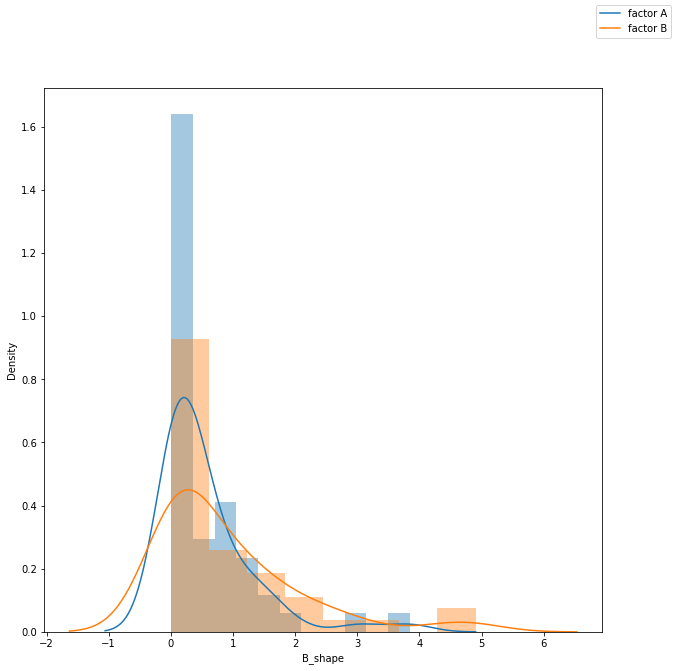

Mean of difference between factor A B is -1.0444155537015574, A mean = 0.6690213138503829, B mean = 2.193000802391756


In [3]:
compare_factors(np.random.exponential, n=50)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 13.97it/s]


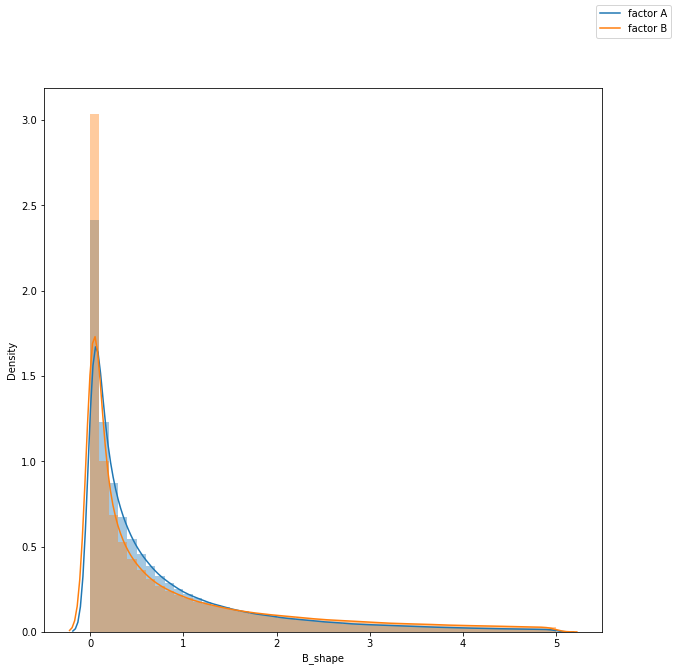

Mean of difference between factor A B is -0.9999561069890461, A mean = 1.0028064198691518, B mean = 1.998854657483655


In [4]:
compare_factors(np.random.exponential)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 23505.53it/s]


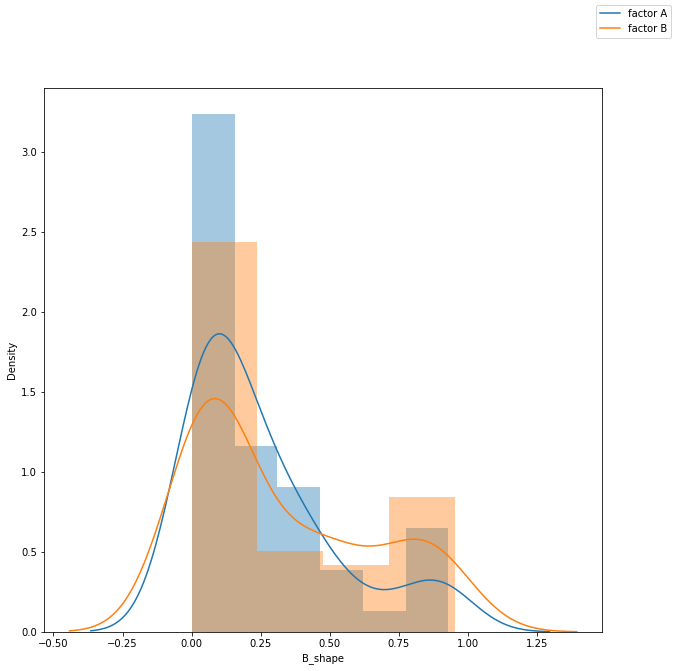

Mean of difference between factor A B is -0.0830717226580722, A mean = 0.2545388430971484, B mean = 0.32419811394132325


In [75]:
compare_factors(np.random.uniform, n=50)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.05it/s]


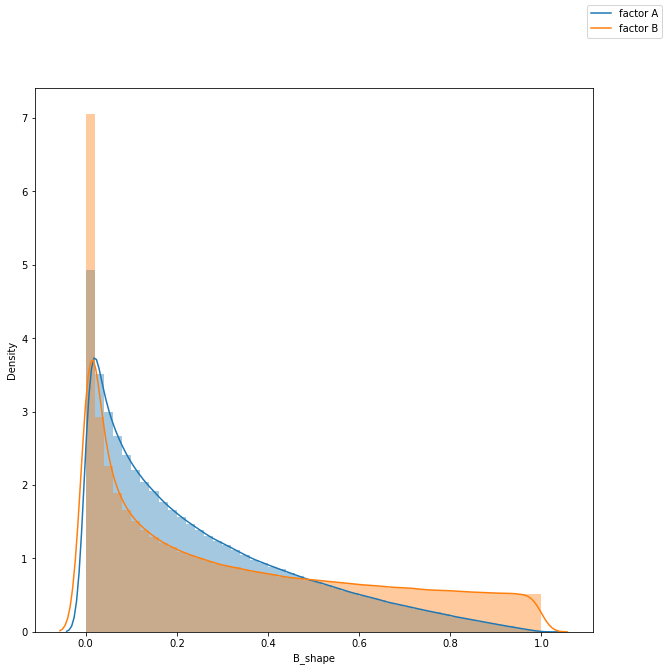

Mean of difference between factor A B is -0.08332561328965742, A mean = 0.24985804915219004, B mean = 0.333747551178944


In [76]:
compare_factors(np.random.uniform)

# Q2

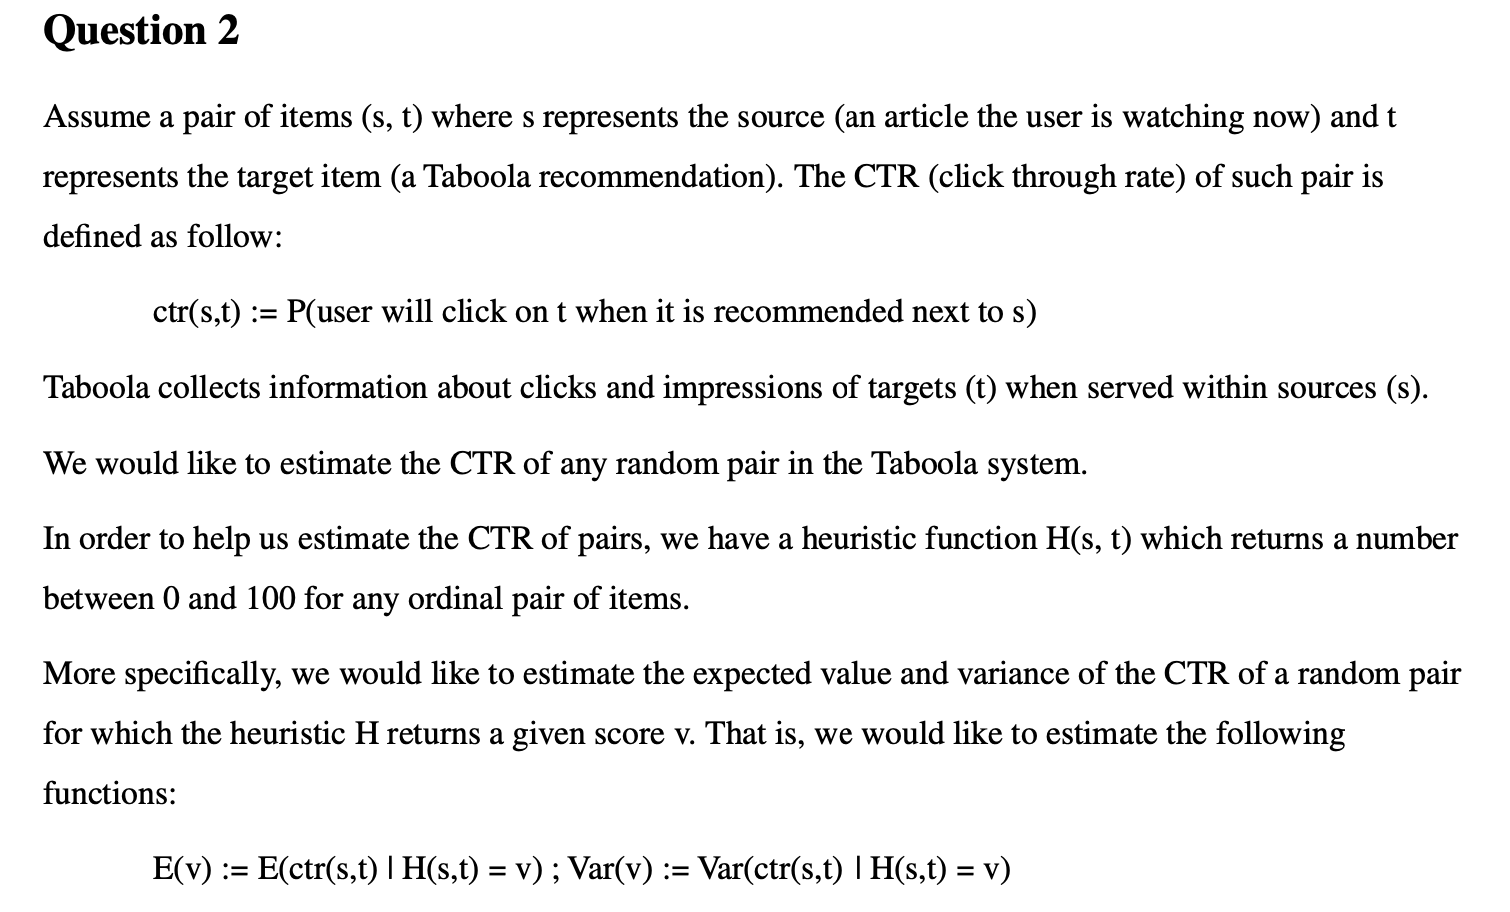

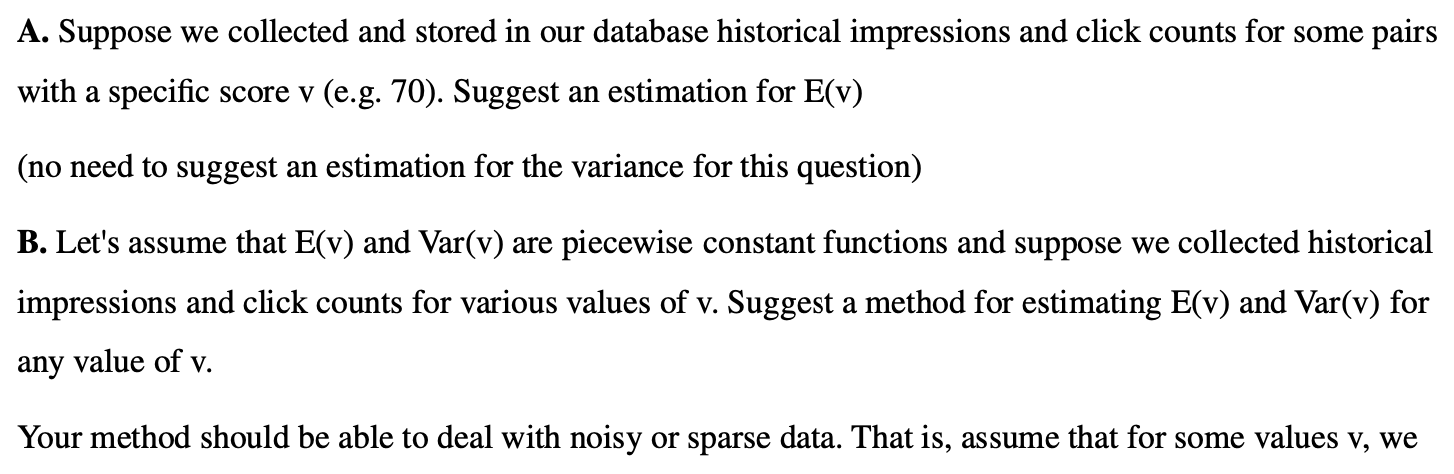

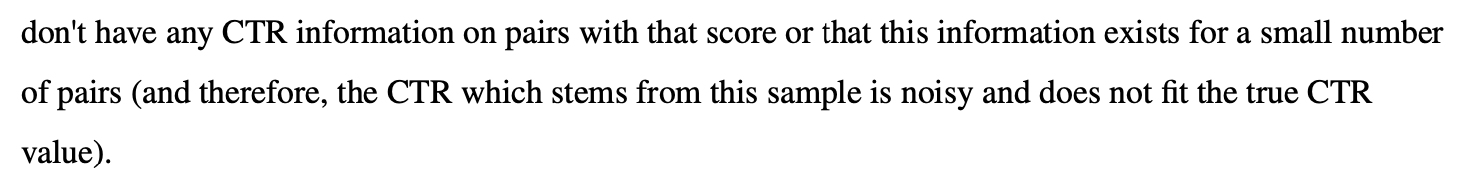

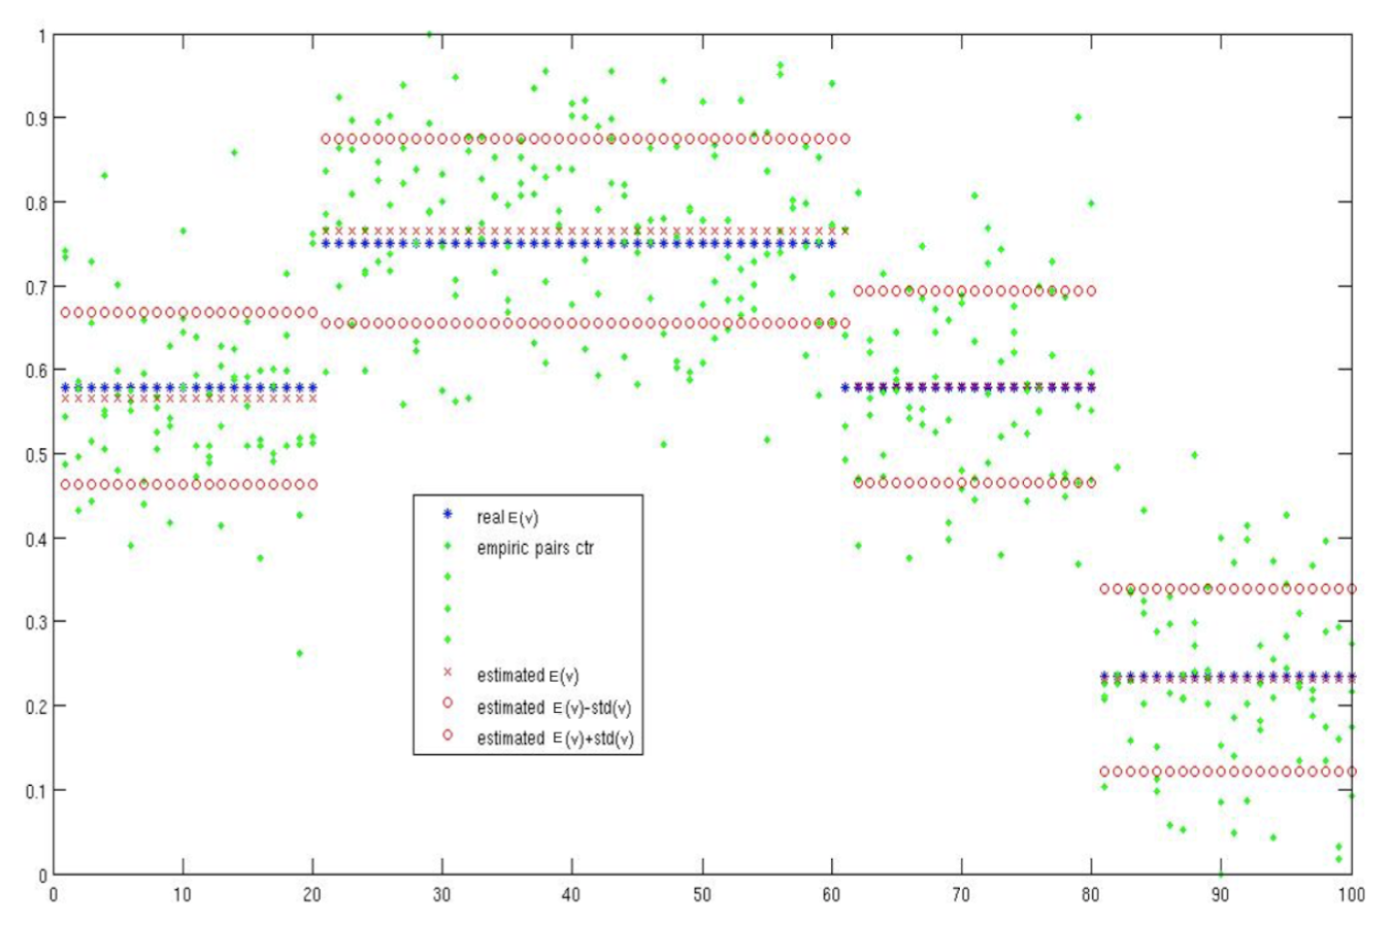

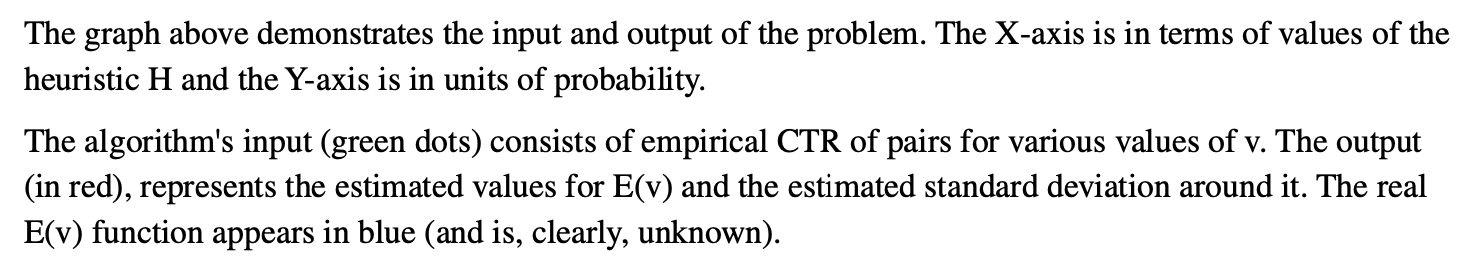

## Problem Statement

Given historical empirical CTR of pairs for various values of $v$.

We are going to estimate the following equations:

- Expected value $E(v):=E(ctr(s,t)|H(s,t)=v)$
- Variance $Var(v):=Var(ctr(s,t)|H(s,t)=v)$

Heuristic function $H(s,t)$ generates a number $[0, 100]$.

We have to find the estimated expected values and variances among number $[0, 100]$, while the real $E(v)$ remains unknown.

## Solution

As illustrated in the figure, we can see that there are estimated $E(v)$ to respective heuristic scores.

There are multiple occurrenced $CTR(s,t)$ with specific score, and we can describe probability distribution of $CTR$ in the individual score.

### Example

For instance, given heuristic score $70$ and the empirical $CTR$ values `[0.1, 0.2, 0.2, 0.3, 0.4]`.

We can derive the probability distribution of $CTR$, where $x$ is the probability of $CTR(s, t)$, and $f(x)$ is the value of $CTR(s, t)$:

$x$ | $f(x)$
---|---
$\frac{1}{5}=0.2$ | $0.1$
$\frac{2}{5}=0.4$ | $0.2$
$\frac{1}{5}=0.2$ | $0.3$
$\frac{1}{5}=0.2$ | $0.4$

$E(v) = \int_{0}^{1}x f(x)dx = \mu$

$Var(v) = E(v^2) - E(v)^2 = \int_{0}^{1}x^2 f(x)dx - \mu^2$

In this example, we can derive the expected value and variance:
- $E(70) = 0.2*0.1 + 0.4*0.2 + 0.2*0.3 + 0.2*0.4 = 0.24$
- $Var(70) = (0.2)^2*0.1 + (0.4)^2*0.2 + (0.2)^2*0.3 + (0.2)^2*0.4 - (0.24)^2 = 0.0064$

### Architecture

Along with the example above, we can design a two-layer data structure to store heuristic scores and $CTR$ information.

1. Size 100 of array to store $CTR$ information.
2. Hashmap to store the probability and value of $CTR$.

`X = [map(CTR(s, t)) for i in 100]`

### Question A

In the question A), the value of $E(v)$ with the probability distribution of $CTR$ in value $v$ is estimated.

The estimation procedure is:

1. Calculate the probability of $CTR(s, t)$ in value $v$.
2. Calculate the expected value $E(v)$ with probability of $CTR(s, t)$ and value of $CTR(s, t)$.

The time complexity of the estimation is $O(n)$, and the space complexity is $O(n)$, where $n$ is the size of $CTR$ data.

### Question B

Based on the basic estimation $E(v)$ and $Var(v)$ from question A), we should further consider two scenarios.

1. Noisy Data: Some of the $CTR$ data does not fit the true $CTR$ value.
2. Sparse Data: $CTR$ data is not available in the score $v$.

The estimation procedure is:

1. Filter the noisy $CTR$ data in each score.
2. Calculate the estimated $E(v)$ and $Var(v)$ for all available scores.
3. Generate the missing values of $E(v)$ and $Var(v)$ for the scores without $CTR$ data.
    
#### Noisy Data

If the historical $CTR$ data contains some samples which do not fit the true CTR values, we should stem it from our estimation.

As indicated from the question and the figure, the distribution of $CTR$ should be more close to normal distribution, or more centralized distribution.

For a continuous probability distribution, there are three common strategies for detecting outliers.

1. **Z-score**:
    - In normal distribution, $99.8\%$ of data is in $[\mu - 3\sigma, \mu + 3\sigma]$, and $95.6\%$ of data is in $[\mu - 2\sigma, \mu+2\sigma]$.
    - First shift the distribution to $\mu=0, \sigma=1$ with $Z = \frac{X - \mu}{\sigma}$, and then set the threshold for boundaries $2$ or $3$.
2. Inter-Quartile range:
    - For other distributions, we can determine the interquartile range along with the $Q1$ and $Q3$ values for the data.
    - Interquartile range is $Q3 - Q1$, we keep the data ranges $[Q1 - 1.5(Q3 - Q1), Q3 + 1.5(Q3 - Q1)]$, and discard the data outside the range.
3. Percentile:
    - Discard the data under $percentile(1)$ or above $percentile(99)$.
    
In this task, the **Z-score method** is most suggested since the distribution of $CTR$ is closer to normal distribution, and the abnormal data should be excluded with the assumption of normal distribution.

#### Sparse Data

If the historical $CTR$ data does not exist in certain score, we can apply missing value imputation strategies to estimate the missing values.

1. Constant value imputation.
    - Replace $E(v)$ and $Var(v)$ with zero or pre-defined value.
2. **Mean/Median value imputation**.
    - Replace $E(v)$ and $Var(v)$ with mean/median of all available $E(x), Var(x), x \in [0, 100]$.
3. Most frequent value imputation.
    - Replace $E(v)$ and $Var(v)$ with the most frequent of $E(x), Var(x)$.
4. **Most closest value imputation**.
    - Replace $E(v)$ and $Var(v)$ with the closest $E(x), Var(x)$.
5. **k-NN imputation**.
    - Similar to most closest value imputation, but using k-NN algorithm to find k closest $E(x)$ and $Var(x)$ and get weighed $E(v)$.
    
Intuitively, the distribution of $CTR$ should be close to the one with closest score.

The methods 2, 4, and 5 are most recommended since it can better capture the overall distribution of $E(v)$, and provide an intermediate estimation.

In order to apply a weighed estimation, at first we should know the calculation of $E$ and $Var$.

Assume $X, Y$ are two random variables, $Cov[X,Y]$ is the covariance of $X,Y$.

1. $E$
    - $E[kX] = kE[X], k \in \mathbb{R}$
    - $E[X + c] = E[X]+c, c \in \mathbb{R}$
    - $E[X+Y] = E[X] + E[Y]$
2. $Var$
    - $Var[kX] = k^2Var[X], k \in \mathbb{R}$
    - $Var[X+c] = Var[X], c \in \mathbb{R}$
    - $Var[aX + bY] = a^2 Var[X] + b^2 Var[Y] + 2ab Cov[X,Y], a,b \in \mathbb{R}$
    
The methods can be classified into two categories:

1. Non-Weighed:
    - In this method, the estimated $E(v)$ and $Var(v)$ are acquired by known values of $E$ and $Var$.
    - Methods: median, and most closest value imputation.
2. Weighed:
    - In this method, the estimated $E(v)$ and $Var(v)$ are evaluated using weighed values of $E$ and $Var$.
    - Given $x = [x_1, x_2, ..., x_n]$ for all available estimations.
    - $E(v) = \frac{\sum{E(x)}}{n}$
    - $Var(v) = \frac{\sum{Var(x)}}{n^2}$
    - Methods: mean, and k-NN value imputation.
    
In this task, we would like to approximate the values to their neighborhoods.

Therefore, **k-NN** value imputation is most suggested because it takes more closest scores into account, and the results should be more robust than most closest value imputation.

## Question B - plus

Previous proposed method is incapable of modeling $E(v)$ and $Var(v)$ as piecewise constant functions. 

Thus, an improved method is adopted using **decision tree regression algorithm**.

As can be observed from the problem, the piecewise constant function can be modeled with constant intervals. And it would be a perfect idea to adopt decision tree regression, so that the decision boundary of the algorithm can be deemed as our estimated intervals.

Decision tree algorithm is capable of modeling regression problem with piecewise constant function, and it is helpful in groups of data. However, the decision tree is easily to get over-fitting on the data, and we will require a stronger pruning technique to avoid such issue. 


The strong point of decision tree is that it can cope with sparse or anomolous data, it will take the average/nearby values into account to generate the prediction.

In [156]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [105]:
def create_ctr_dataset(mu=0., var=1., n=200, noise=0.2):
    arr = np.random.normal(mu, var, size=n)
    arr = arr[np.logical_and(arr > 0, arr < 1.)]
    indices = np.random.choice(np.arange(arr.size), replace=False, size=int(arr.size * noise))
    prob = np.random.rand(indices.size)
    arr[indices] = prob
    return arr

In [130]:
def generate_heuristic_dataset():
    data = list()
    # total = 100
    for _ in range(40):
        data += [create_ctr_dataset(0.1, 0.1, 500)]
    for _ in range(20):
        data += [create_ctr_dataset(0.3, 0.15, 500)]
    for _ in range(15):
        data += [create_ctr_dataset(0.8, 0.05, 500)]
    for _ in range(25):
        data += [create_ctr_dataset(0.2, 0.05, 500)]
    # x = [[mean, variance] for _ in range(100)]
    arr = np.array([[np.mean(x), np.mean((x - np.mean(x)) ** 2)] for x in data])
    return data, arr

In [171]:
def draw_decision_tree(data, arr, depth):
    scores = 100
    X = np.expand_dims(np.arange(scores), 1)
    # y1 = mean, y2 = variance
    y1 = arr[:, 0]
    y2 = arr[:, 1]

    # add sparsity
    indices = np.random.choice(np.arange(scores), replace=False, size=int(scores * 0.9))
    X, y1, y2 = X[indices], y1[indices], y2[indices]

    # Fit regression model
    X_test = np.arange(0.0, 100.0, 1)[:, np.newaxis]
    reg_e = DecisionTreeRegressor(max_depth=depth).fit(X, y1)
    reg_v = DecisionTreeRegressor(max_depth=depth).fit(X, y2)
    e = reg_e.predict(X_test)
    v = reg_v.predict(X_test)

    plt.figure(figsize=(24, 20))
    for i in indices:
        plt.scatter(np.ones_like(data[i]) * i, data[i], s=1, c='black')
    plt.scatter(X, y1, s=30, label="mean")
    plt.scatter(X, y2, s=30, label="variance")
    plt.plot(X_test, e, label=f"e(v) max_depth={depth}", linewidth=10)
    plt.plot(X_test, e + np.sqrt(v), label=f"e(v) + std(v) max_depth={depth}", linewidth=10)
    plt.plot(X_test, e - np.sqrt(v), label=f"e(v) - std(v) max_depth={depth}", linewidth=10)
    plt.xlabel("Heuristic Score")
    plt.ylabel("Probability")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20, 20))
    tree.plot_tree(reg_e)
    plt.title(f"Decision Tree Regression on E, depth={depth}")
    plt.show()
    plt.figure(figsize=(20, 20))
    tree.plot_tree(reg_v)
    plt.title(f"Decision Tree Regression on Var, depth={depth}")
    plt.show()

In [149]:
data, arr = generate_heuristic_dataset()

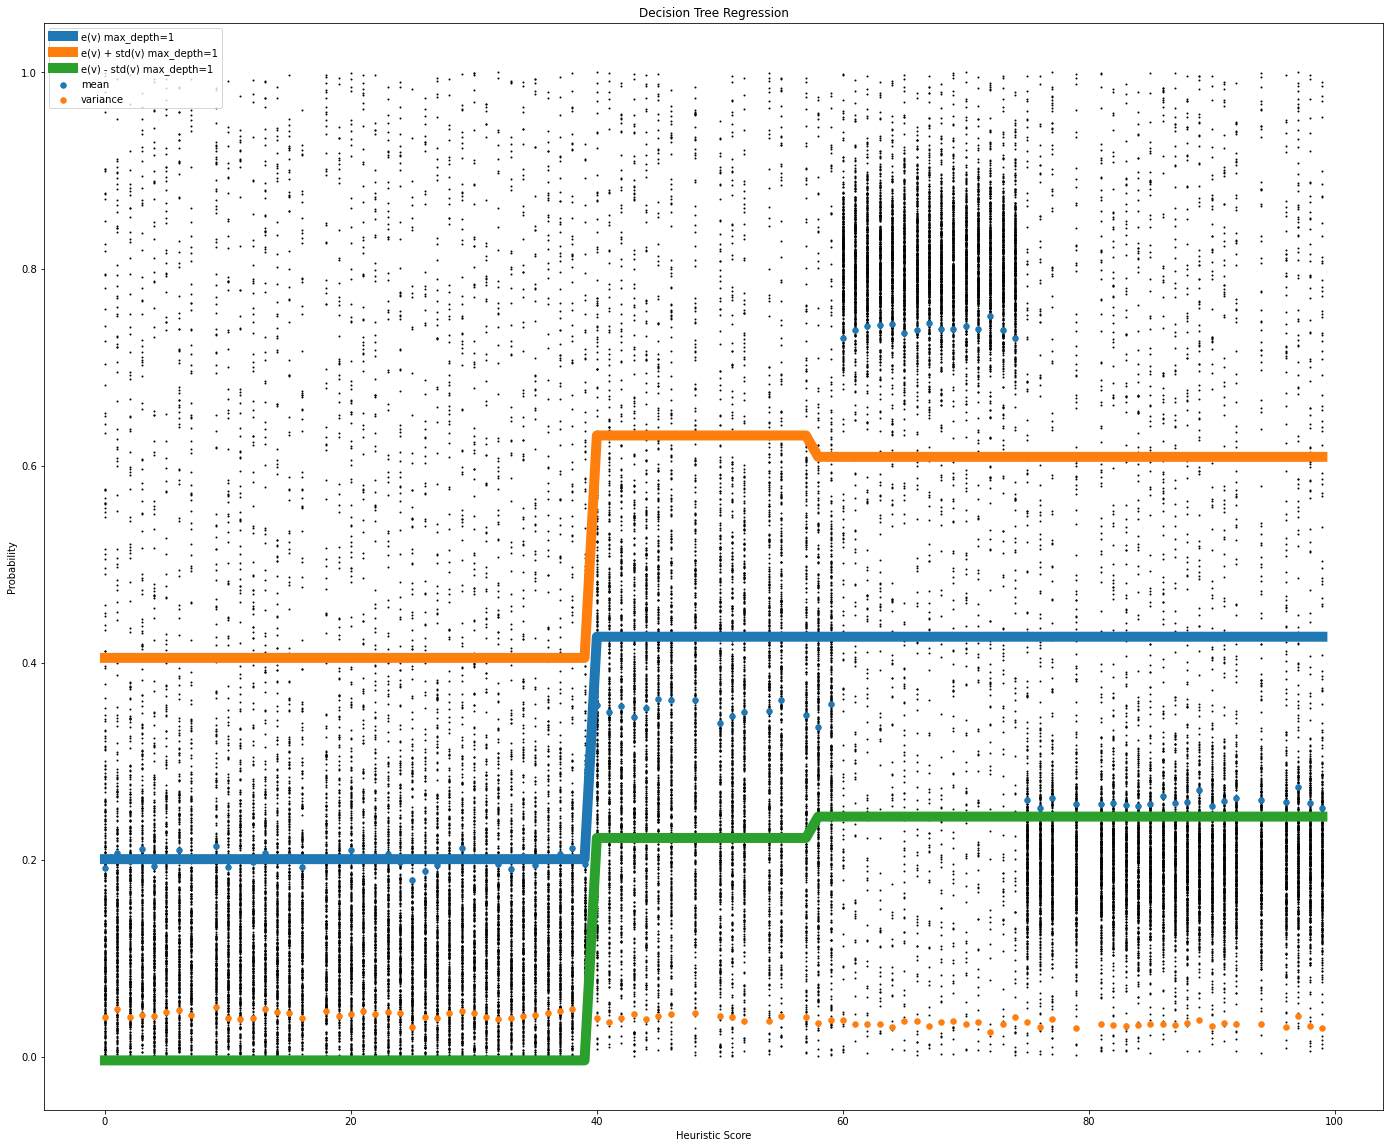

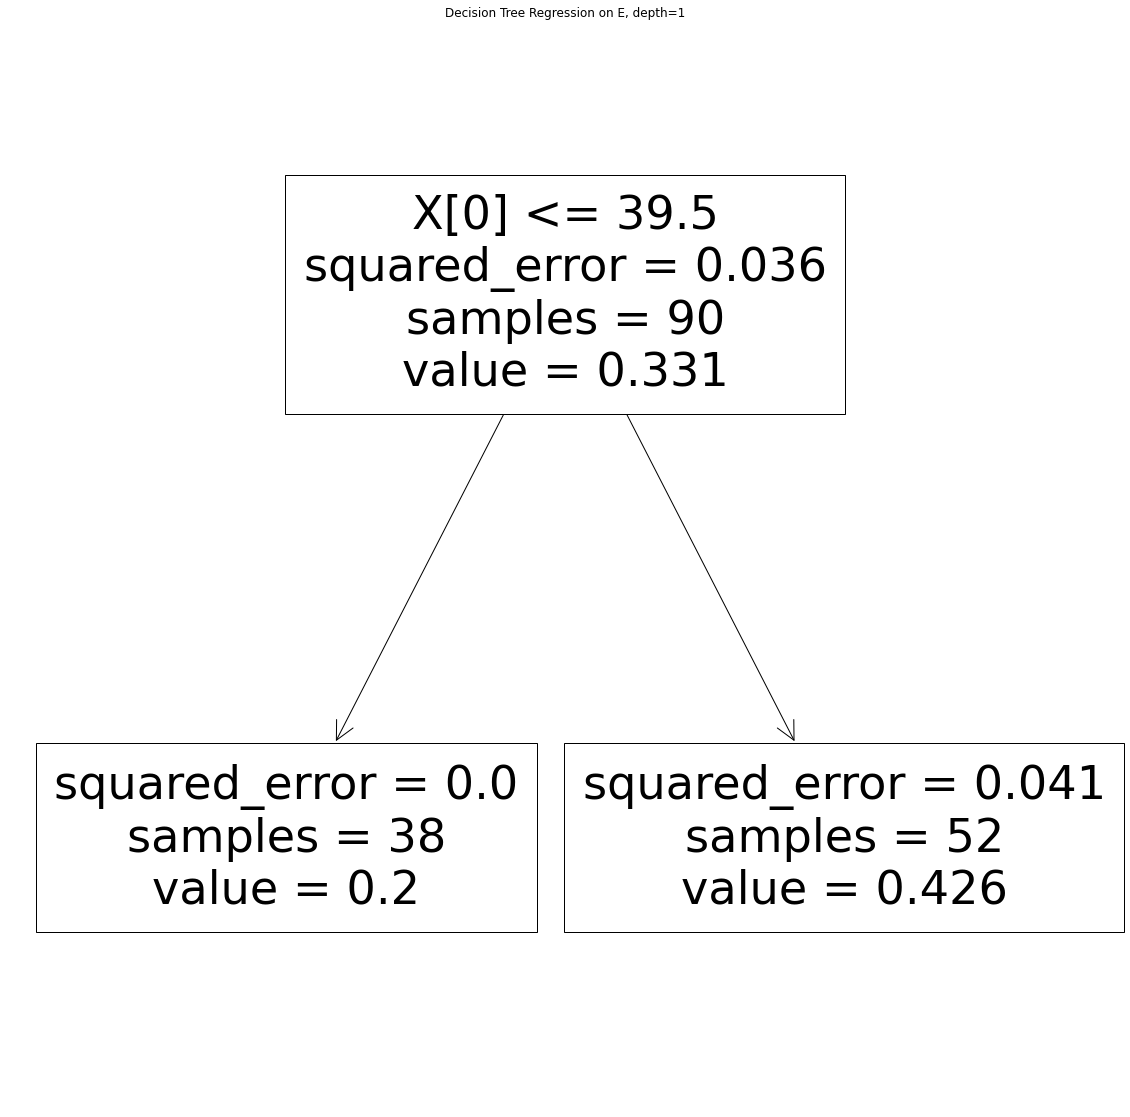

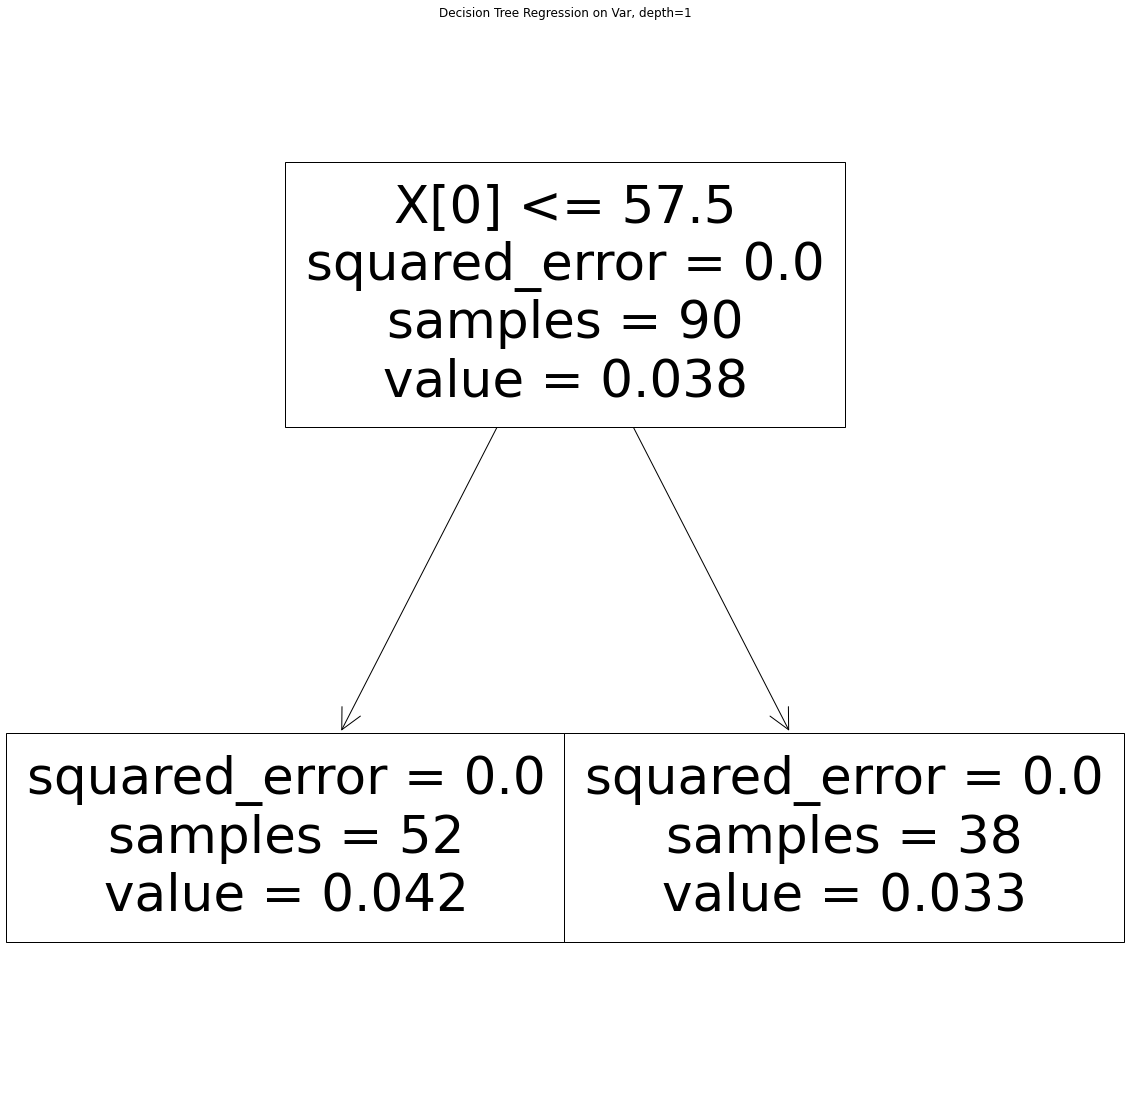

In [172]:
draw_decision_tree(data, arr, 1)

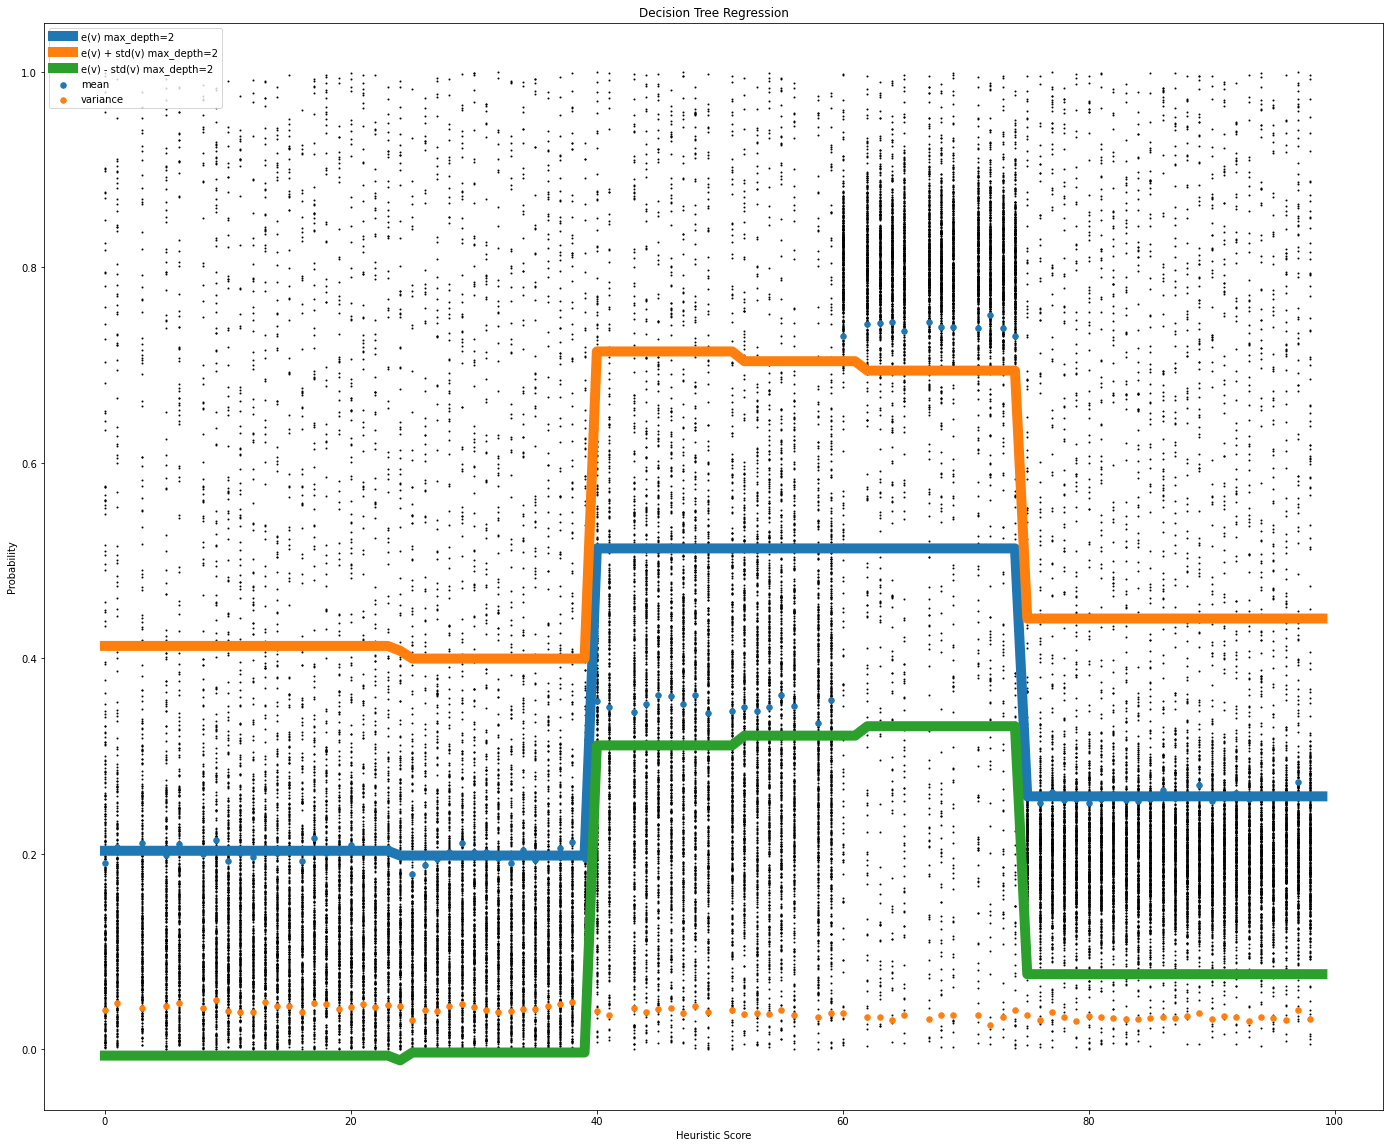

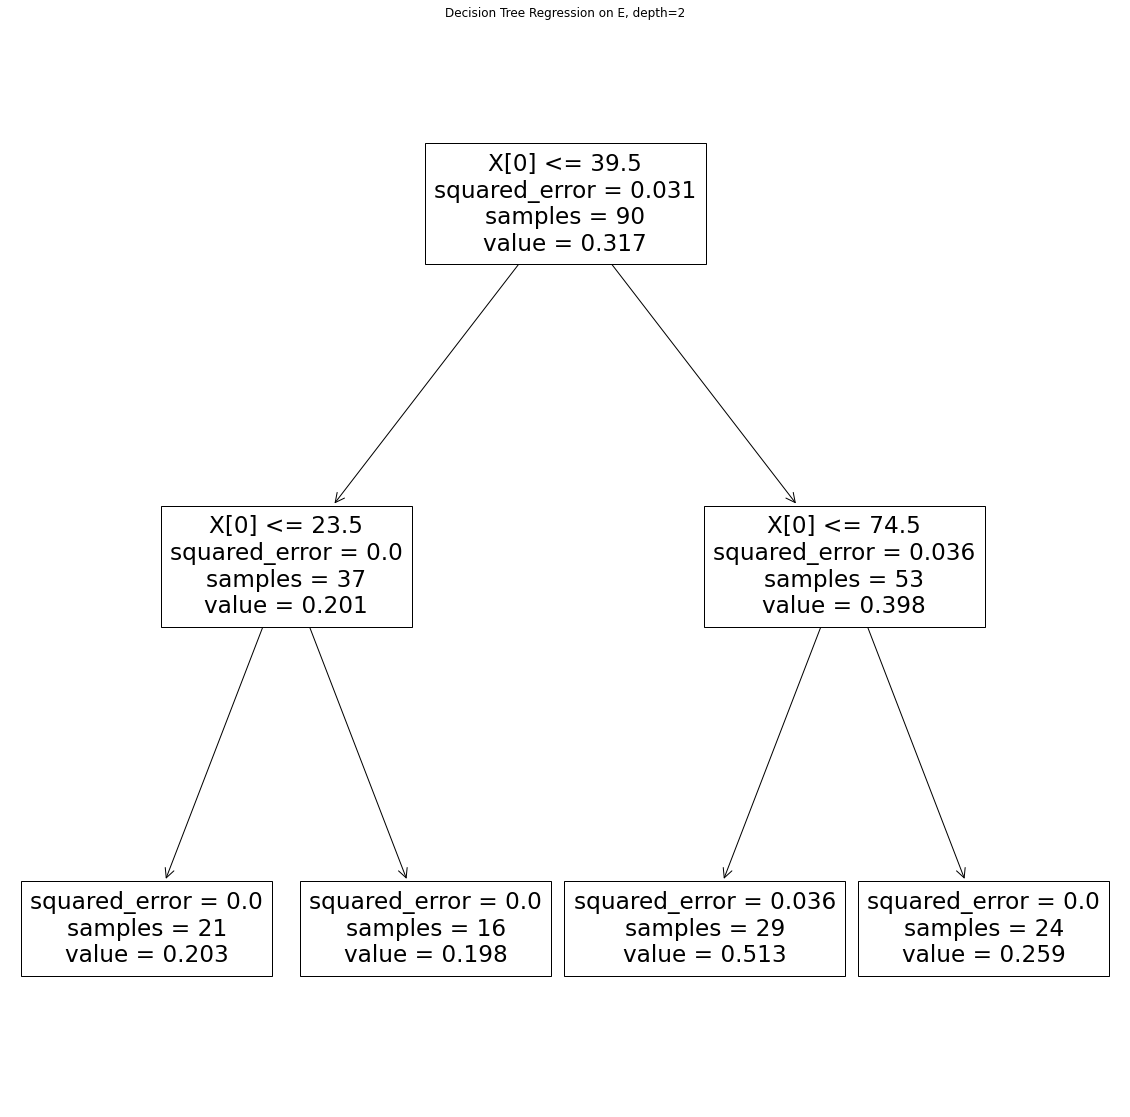

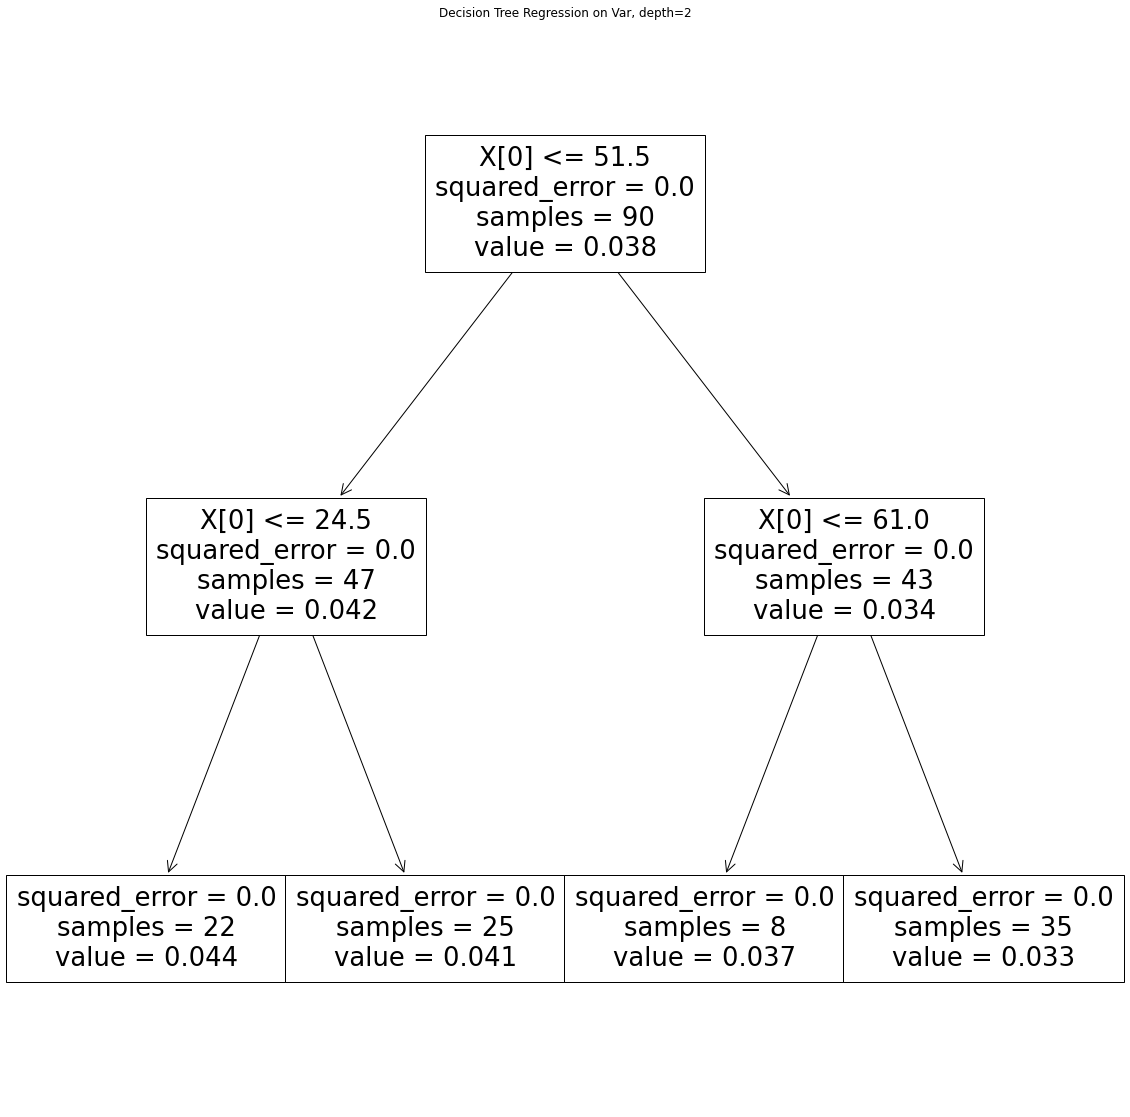

In [173]:
draw_decision_tree(data, arr, 2)

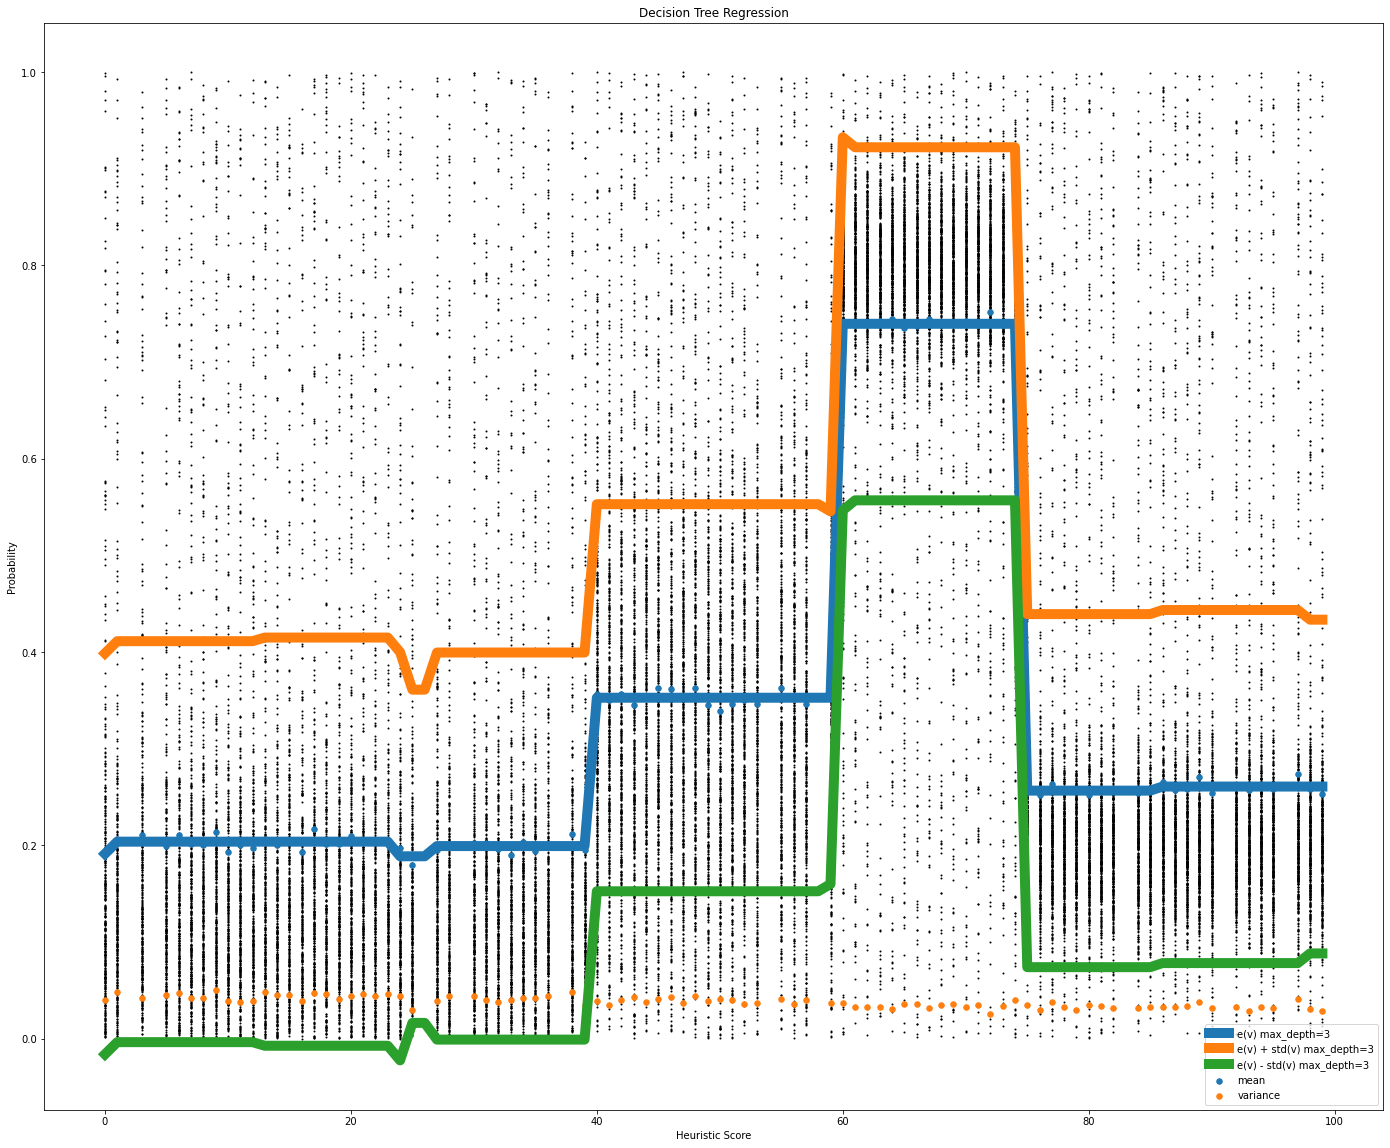

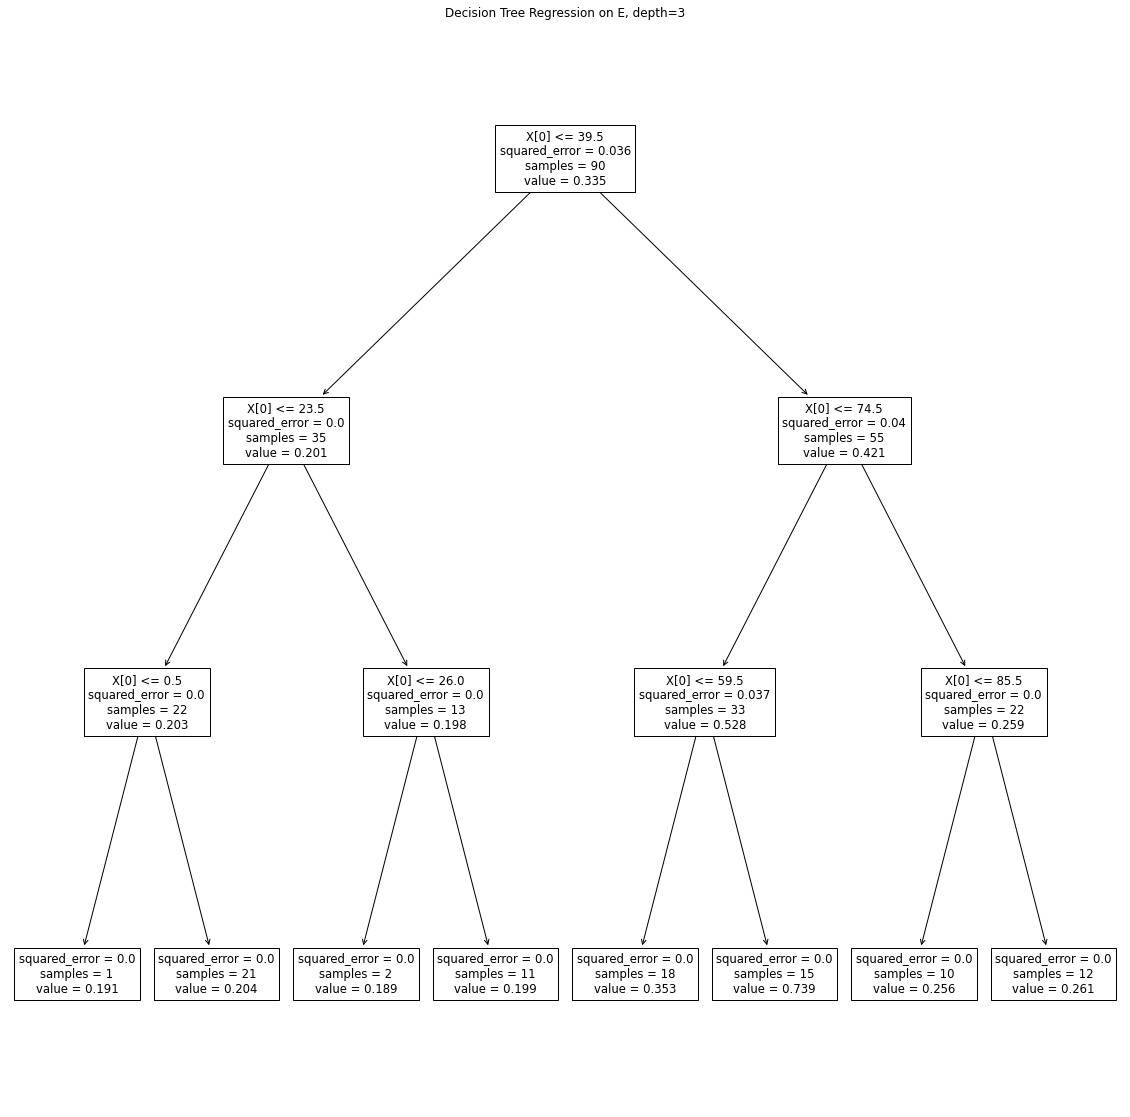

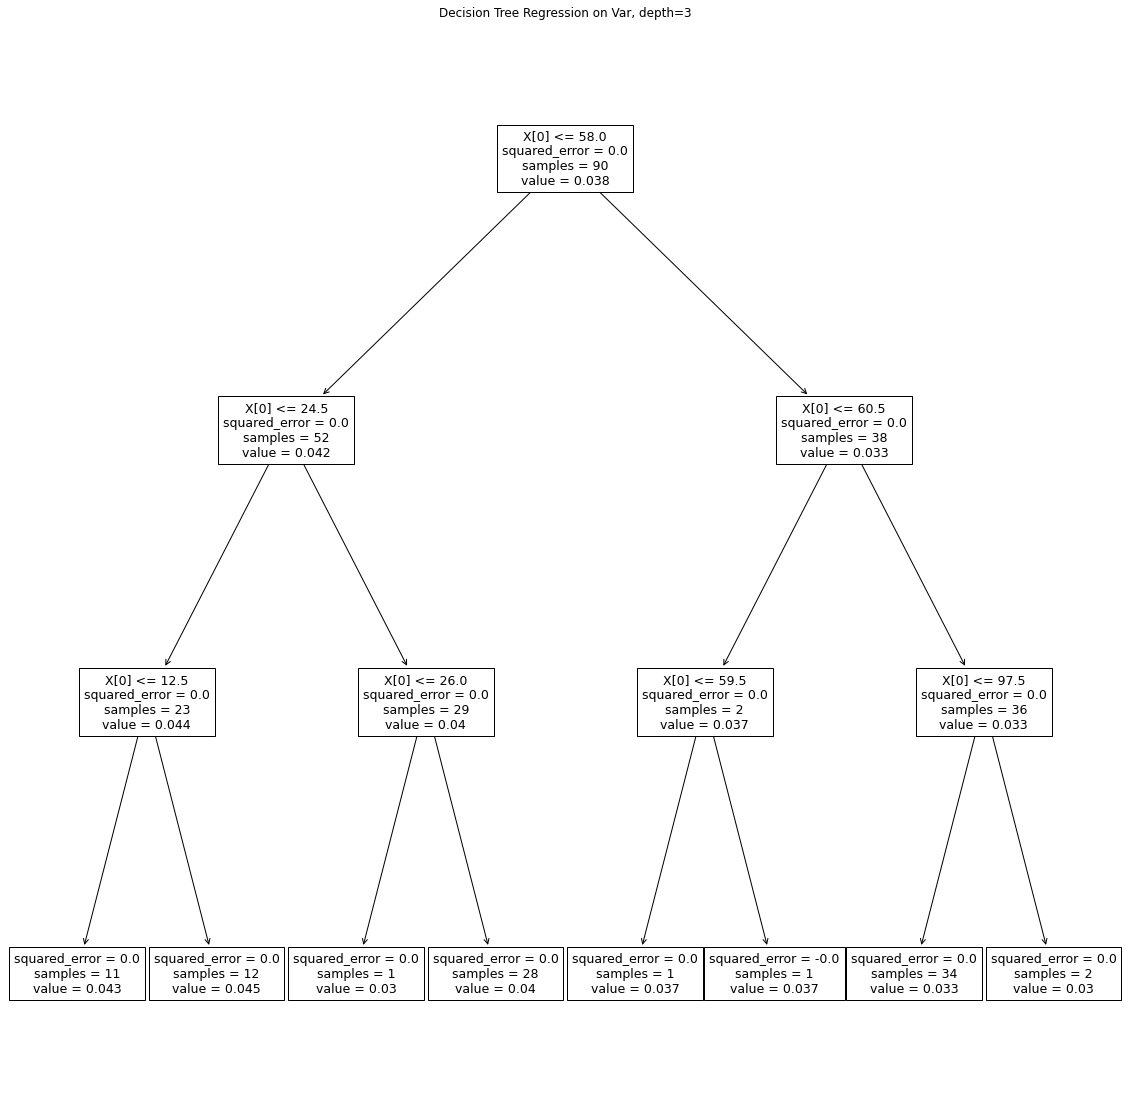

In [174]:
draw_decision_tree(data, arr, 3)

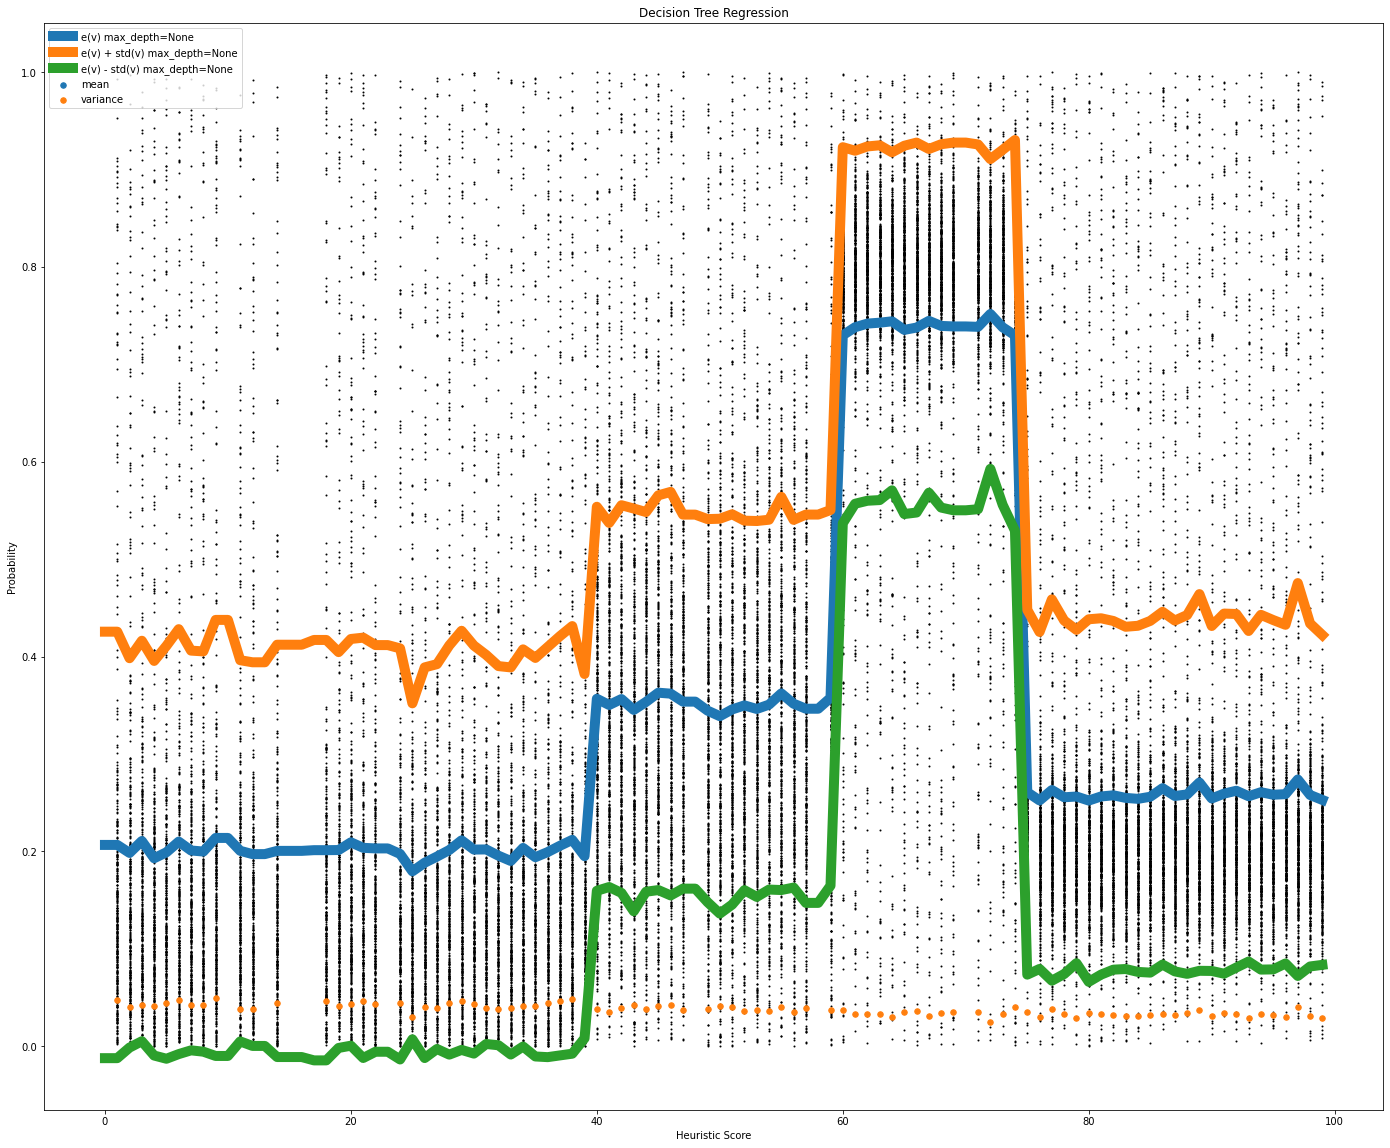

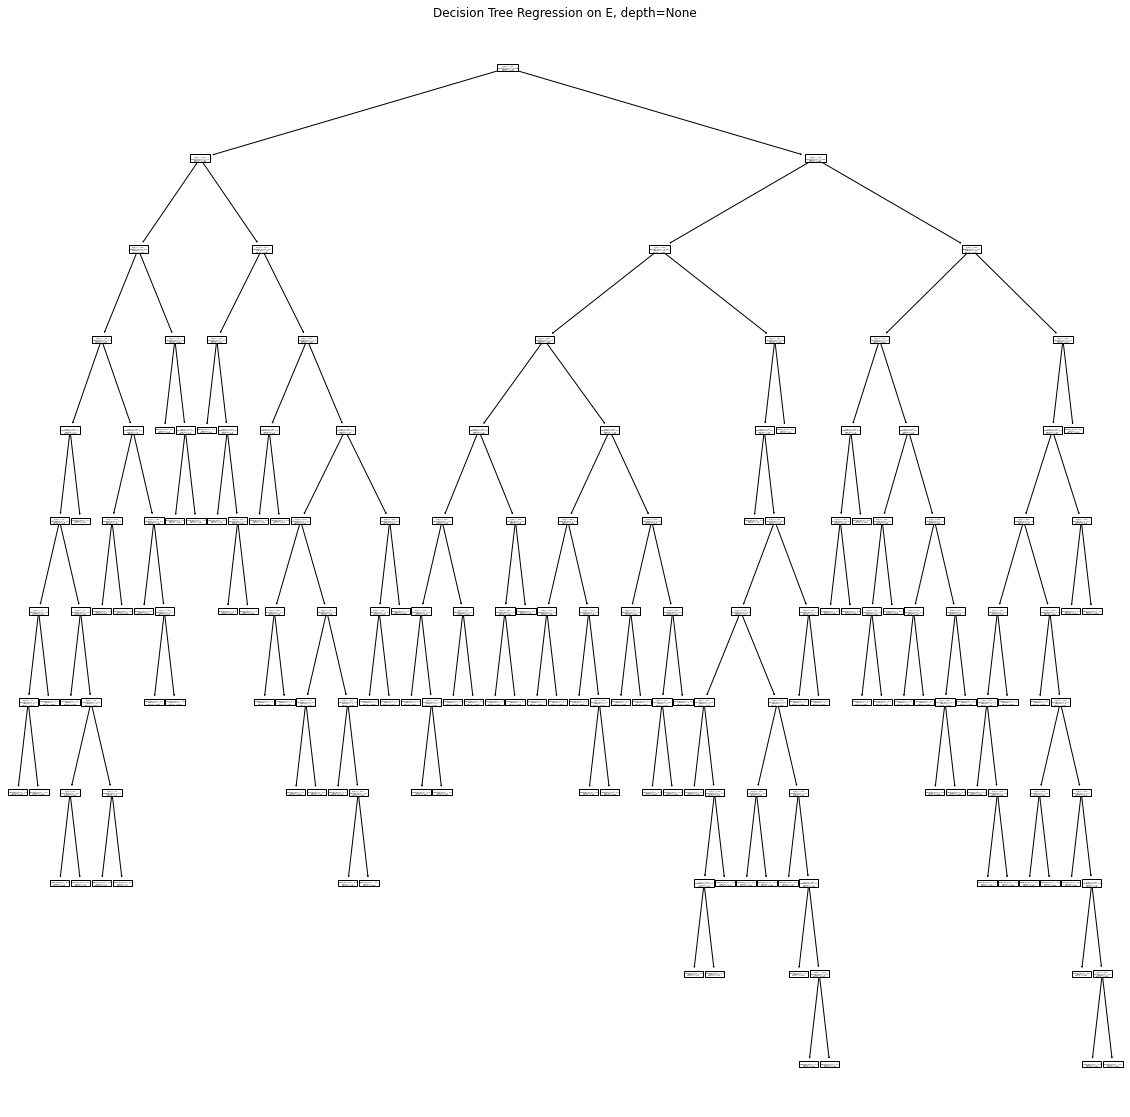

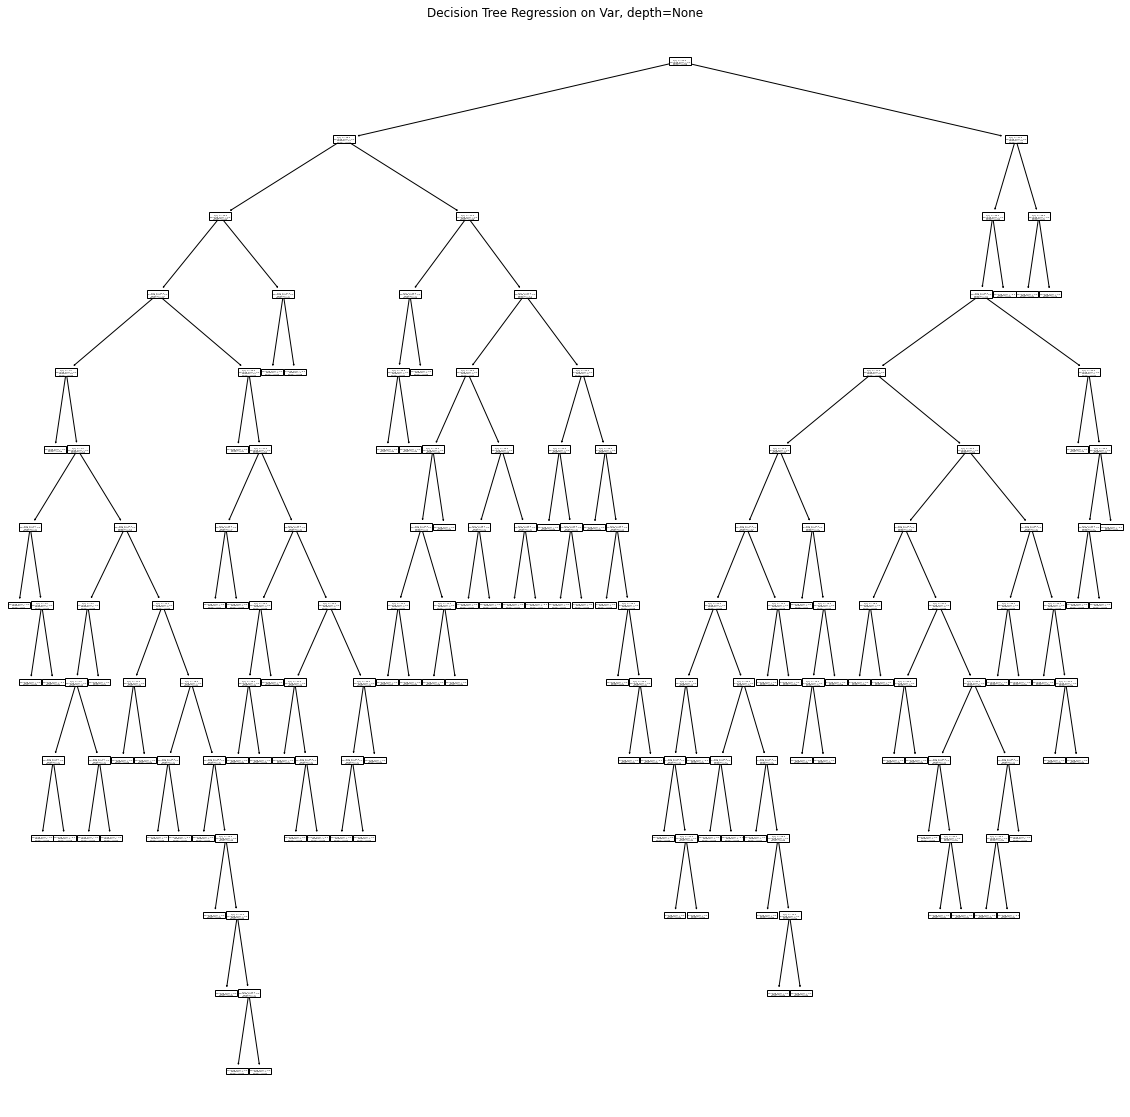

In [175]:
draw_decision_tree(data, arr, None)

# Q3

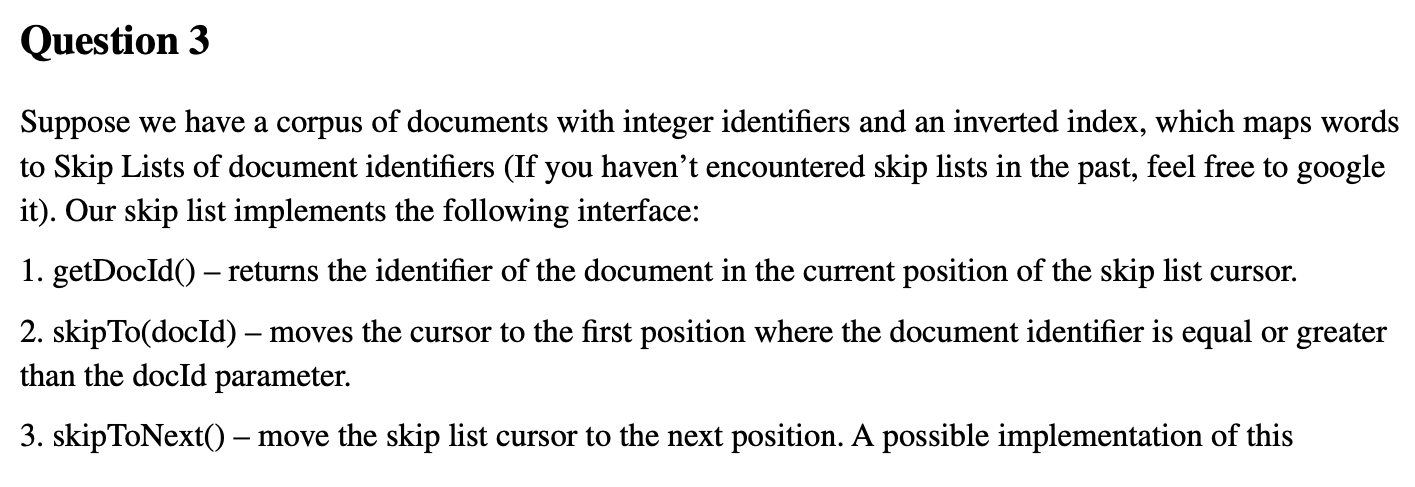

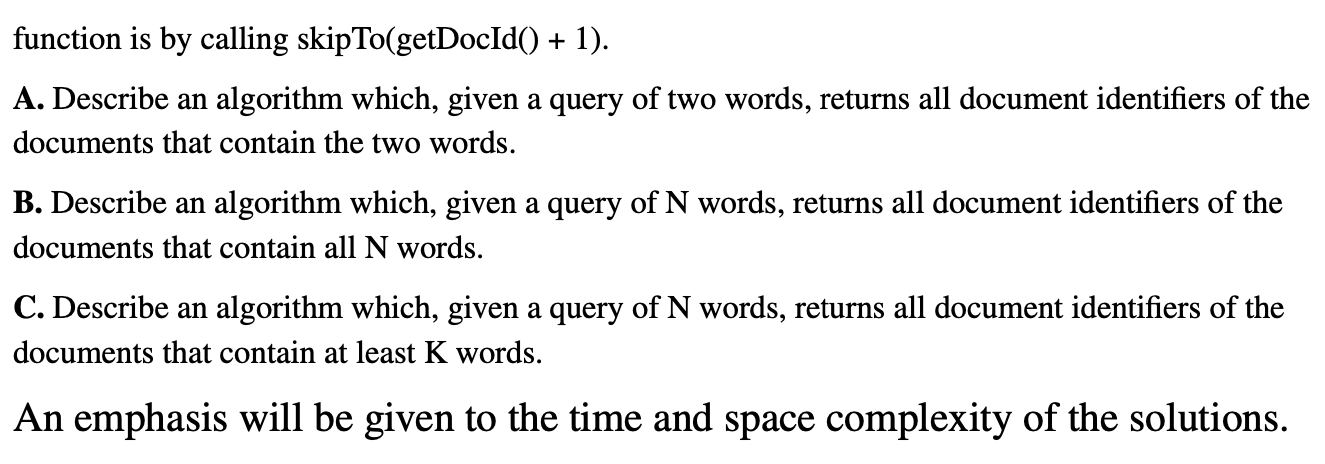

1. What is Skip Lists?
    - In computer science, a skip list is a probabilistic data structure that allows $O(\log n)$ search complexity as well as $O(\log n)$ insertion complexity within an ordered sequence of $n$ elements.
2. What is inverted index?
    - An inverted index is an index data structure storing a mapping from content, such as words or numbers, to its locations in a document or a set of documents.

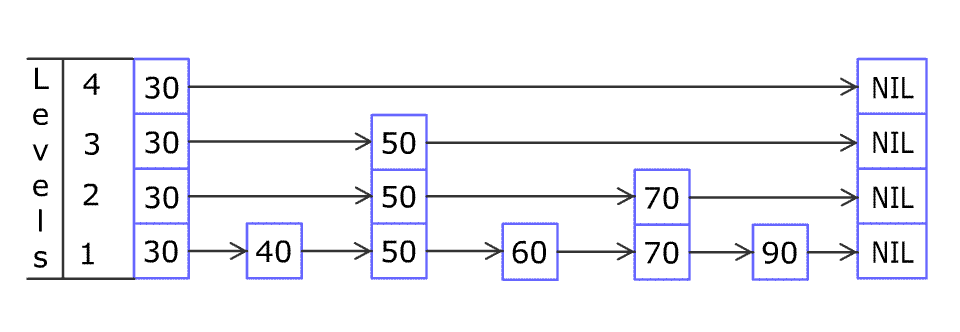

In this question, the Skip List stores the identifiers of documents for the word, and importantly the Skip List saves the identifier in ascending order.
    
Simply says, our goal is to merge the postings (skip list) for the queried words.

In [11]:
from typing import Dict, Set
'''
    Suppose we have a map containing <word, skip_list>

    e.g., skip_lists = {"hello": SkipListObject, ...}

    SkipListObject has interfaces:
        - getDocId(): returns current document ID
        - skipTo(docId): move skip list cursor greater and equal than document ID
        - skipToNext(): move to next document ID
'''

class SkipList:
    def getDocId():
        pass
    
    def skipTo(doc_id):
        pass
    
    def skipToNext():
        pass

    
def solution_A(skip_lists: Dict[str, SkipList], word_a: str, word_b: str) -> Set[str]:
    '''
        Time Complexity: O(n), where n = total number of nodes from word_a and word_b.
        Space Complexity: O(1), where there is extra constant space allocated.
    '''
    cur_a = skip_lists[word_a]
    cur_b = skip_lists[word_b]
    # iterate through the lists until one reaches end
    ans = set()
    while cur_a and cur_b:
        doc_a = cur_a.getDocId()
        doc_b = cur_b.getDocId()
        # if doc_a matches doc_b -> append matched answer
        if doc_a == doc_b:
            ans.add(doc_a)
            cur_a.skipToNext()
            cur_b.skipToNext()
        # if doc_a > doc_b -> move cursor of cur_b one step ahead
        elif doc_a > doc_b:
            cur_b.skipTo(doc_a)
        # if doc_a < doc_b -> move cursor of cur_a one step ahead
        else:
            cur_a.skipTo(doc_b)
    return ans


def solution_B(skip_lists: Dict[str, SkipList], words: List[str]) -> Set[str]:
    '''
        Time Complexity: O(n * m), where n = len(words), m = total number of nodes.
        Space Complexity: O(n), size n list is allocated to store document ids.
    '''
    heads = [skip_lists[word] for word in words]
    n = len(heads)
        
    ans = set()
    # check if all cursors are available
    while all(heads):
        min_doc_id, min_idx = float('inf'), 0
        doc_ids = list()
        for i in range(n):
            doc_id = heads[i].getDocId()
            if min_doc_id > doc_id:
                min_doc_id = doc_id
                min_idx = i
            doc_ids.append(doc_id)
            
        match = True
        for i in range(n):
            if doc_ids[i] == min_doc_id:
                heads[i].skipToNext()
            else:
                match = False
        
        if match:
            ans.add(min_doc_id)
    return ans


def solution_C(skip_lists: Dict[str, SkipList], words: List[str], k: int) -> Set[str]:
    '''
        Time Complexity: O(n * m), where n = len(words), m = total number of nodes.
        Space Complexity: O(n), size n list is allocated to store document ids.
    '''
    heads = [skip_lists[word] for word in words]
    n = len(heads)

    ans = set()
    # check if all cursors are available
    while all(heads):
        min_doc_id, min_idx = float('inf'), 0
        doc_ids = list()
        for i in range(n):
            doc_id = heads[i].getDocId()
            if min_doc_id > doc_id:
                min_doc_id = doc_id
                min_idx = i
            doc_ids.append(doc_id)
        
        # made a slight modification on the condition of saving answer
        match = 0
        for i in range(n):
            if doc_ids[i] == min_doc_id:
                heads[i].skipToNext()
                match += 1
        
        if match >= k:
            ans.add(min_doc_id)
    return ans


def solution_C_update(skip_lists: Dict[str, SkipList], words: List[str], k: int) -> Set[str]:
    '''
        Time Complexity: O(n * m), where n = len(words), m = total number of nodes.
        Space Complexity: O(n), size n list is allocated to store document ids.
    '''
    heads = [skip_lists[word] for word in words]
    n = len(heads)

    ans = set()
    # check if `any` cursors are available
    while any(heads):
        min_doc_id, min_idx = float('inf'), 0
        doc_ids = list()
        for i in range(n):
            doc_id = None
            if heads[i]:
                doc_id = heads[i].getDocId()
                if min_doc_id > doc_id:
                    min_doc_id = doc_id
                    min_idx = i
            doc_ids.append(doc_id)
        
        # made a slight modification on the condition of saving answer
        match = 0
        for i in range(n):
            if doc_ids[i] is not None and doc_ids[i] == min_doc_id:
                heads[i].skipToNext()
                match += 1
        
        if match >= k:
            ans.add(min_doc_id)
    return ans

# Q4

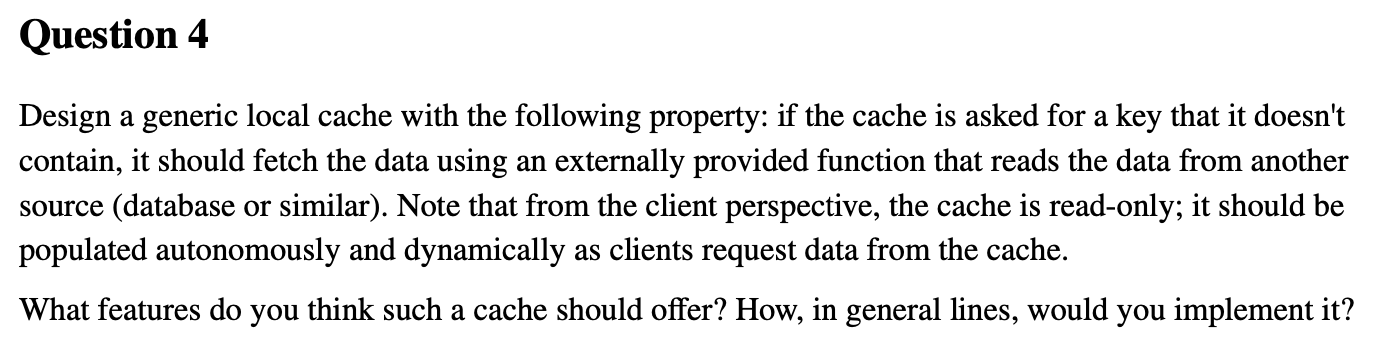

## Solution

Cache is a technique to accelerate data responsiveness without taxing downstream levels. So the most important feature is to preserve most recently used data, to reduce the large portion of data fetching from other sources.

In this question, we can assume the purpose of cache is to speed up the data fetching. Based on the assumption, I illustrate some features such server-side cache should offer:

1. Data consistency
    - It is the most important of the cache, because there are update or delete to the source data, and we must modify or invalidate the corresponding data in cache.
2. High efficiency
    - Efficiency is a good measurement of a cache, since the target of it is to reduce the latency and increase the throughput of the system.
3. High availability
    - Based on the efficiency, it is also important to make sure the cache is available through the time, or it will lose its advantages.
4. Expiration of outdated data
    - It is also important to cast out the expired data, so that the cache can remain a healthy status for serving.

### Implementation

In order to implement a cache for data fetching, we can use tools like **Redis** or **Memcached**. And then we can declare the specifications the cache.

There are three main specifications we should consider at first:

1. Memory space
    - In order to cache the data storage, we should estimate how much memory space is sufficient for caching.
    - A commonly adopted policy for estimating space is to reference the size of source data; for example, if the database takes 100GB for the disk space, we can set a 20%(20GB) for the cache memory using Pareto Law.
2. Cache eviction policies
    - Cache eviction policies determine the strategies we keep the data, and think about the best suited policies for the system.
    - Commonly usage policies are Least Recently Used (LRU) cache, Least Frequently Used (LFU) cache.
3. Data update strategies
    - If there is a cache miss, the service will be forwarded to external data source.
    - We can then update the cache and broadcast to other caches, so as to reduce the missing events.

# Section 2

# Q1

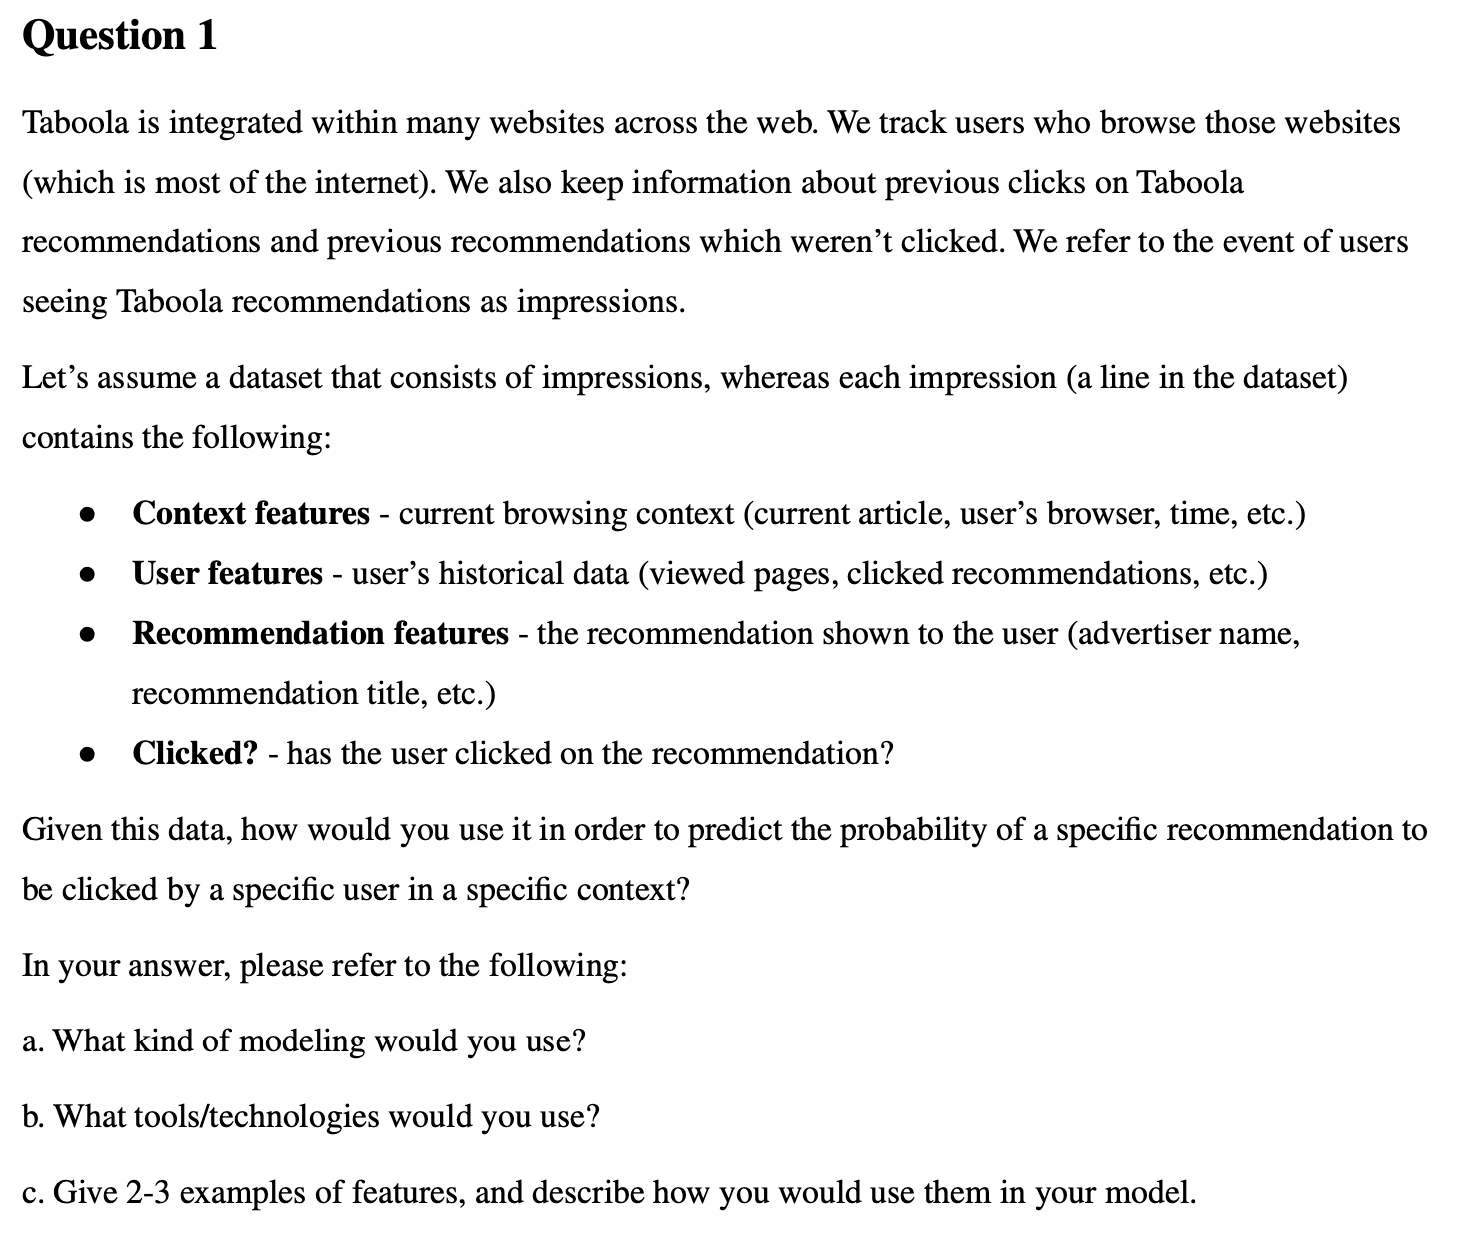

## Solution

As described in the question, our goal is to predict the **probability** of a specific recommendation to be clicked by a specific user.

Since the goal is not to pursue the highest accuracy for user actions, it is quite difficult to find the method to interpret the prediction.

Plain form of deep neural networks (DNNs) classifier would not fit in this task, because the objective function is designed to fit parameters to the data distribution. Previously I had investigated the interpretability of DNNs, that some people might like to obtain the probability from its networks output after softmax layer.

However, the predictions from DNNs model are not probability distribution, and the probabilities are over-estimated in most cases. It is still a challenge to interpret the results
of DNNs.

### Question A

At first, I would like to apply **Naive Bayesian Classifier** in this question, since Bayesian Theorem provides a straightforward estimation of the probability.

$P(C|X) = \frac{P(X|C)P(C)}{P(X)}$, where $X$ is the data and $C$ is the class.

Based on the formula above, we can easily train the model to predict the probability of user clicked on the given recommendation.

### Question B

In order to apply Naive Bayesian Classifier, the overall procedure can be divided into four stages:

1. Preprocessing
    - Technologies
        - Missing value imputation
        - Anomaly detection
        - Normalization
        - Text preprocessing (lowering, stop words removal, punctuations removal, stemming, etc.)
        - Labeling (0-1 labeling)
    - Tools
        - scikit-learn
        - gensim
        - nltk
2. Feature Engineering
    - Technologies
        - Binning
        - Ordinal encoding
        - Bag-of-Words (BOW)/ tf-idf
    - Tools
        - scikit-learn
        - nltk
3. Modeling
    - Technologies
        - Hybrid Naive Bayes Classifier
        - Ensemble of Naive Bayes Classifier
    - Tools
        - numpy
        - scikit-learn
4. Inferencing
    - Technologies
        - Model saving
        - Model serving
    - Tools
        - blob storage
        - model serving server

In [12]:
import pandas as pd

columns = ['current_article', 'user_browser', 'time', 'viewed_pages', 'clicked_recommendations', 'advertiser_name', 'recommendation_title', 'is_clicked']

df = pd.DataFrame([
    ['New Cell Phone Released', 'Safari', '2021-11-13 11:00:00', 20, 5, 'Apple', 'black friday', True],
    ['10 Ways You Did not Know You Could Make Money', 'Safari', '2021-11-10 11:00:00', 5, 2, 'Bussiness', 'Best Ways to Make Money from Home', True]
], columns=columns)

df

current_article user_browser  \
0                        New Cell Phone Released       Safari   
1  10 Ways You Did not Know You Could Make Money       Safari   

                  time  viewed_pages  clicked_recommendations advertiser_name  \
0  2021-11-13 11:00:00            20                        5           Apple   
1  2021-11-10 11:00:00             5                        2       Bussiness   

                recommendation_title  is_clicked  
0                       black friday        True  
1  Best Ways to Make Money from Home        True

### Question C

Given the data above, it is better to take a close look on the data format.

1. Categorical Features: `[user_browser, advertiser_name]`
    - Ordinal encoding
2. Continuous Features: `[time, viewed_pages, clicked_recommendations]`
    - Normalization
3. Text Features: `[current_article, recommendation_title]`
    - BOW/tf-idf to categorical features
4. Prediction: `[is_clicked]`
    - Labeling

Before training the model, we should perform data preprocessing, and make sure there is no anomal data.

In the modeling, we have two options:

1. Design a hybrid form of naive bayes classifier which takes categorical and continuous features simultaneously.
2. Design an ensemble method of separate categorical and continuous naive bayes classifers.

After training the model, we shall save the model to a blob storage, and build a API server to serve the prediction service.

Expected output will be $y \in [0, 1]$.